<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Introduction" data-toc-modified-id="0.-Introduction-0">0. Introduction</a></span></li><li><span><a href="#1.-Explore-&amp;-Explain-the-Data" data-toc-modified-id="1.-Explore-&amp;-Explain-the-Data-1">1. Explore &amp; Explain the Data</a></span><ul class="toc-item"><li><span><a href="#1.1.-Understand-the-structure" data-toc-modified-id="1.1.-Understand-the-structure-1.1">1.1. Understand the structure</a></span><ul class="toc-item"><li><span><a href="#1.1.1.-A-glimpse-of-the-data" data-toc-modified-id="1.1.1.-A-glimpse-of-the-data-1.1.1">1.1.1. A glimpse of the data</a></span></li><li><span><a href="#1.1.2.-What-type-of-data-missing?" data-toc-modified-id="1.1.2.-What-type-of-data-missing?-1.1.2">1.1.2. What type of data missing?</a></span></li></ul></li><li><span><a href="#1.2.-Understand-the-features" data-toc-modified-id="1.2.-Understand-the-features-1.2">1.2. Understand the features</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Order-book" data-toc-modified-id="1.2.1-Order-book-1.2.1">1.2.1 Order book</a></span></li><li><span><a href="#1.2.2.-Auction-Order-Book" data-toc-modified-id="1.2.2.-Auction-Order-Book-1.2.2">1.2.2. Auction Order Book</a></span></li><li><span><a href="#1.2.3.-Combined-Book" data-toc-modified-id="1.2.3.-Combined-Book-1.2.3">1.2.3. Combined Book</a></span></li></ul></li><li><span><a href="#1.3-Understand-the-target" data-toc-modified-id="1.3-Understand-the-target-1.3">1.3 Understand the target</a></span></li></ul></li><li><span><a href="#2.-LightGBM-Baseline" data-toc-modified-id="2.-LightGBM-Baseline-2">2. LightGBM Baseline</a></span><ul class="toc-item"><li><span><a href="#2.1.-Naive-Baseline" data-toc-modified-id="2.1.-Naive-Baseline-2.1">2.1. Naive Baseline</a></span></li><li><span><a href="#2.2.-Simplest-LightGBM-Solution" data-toc-modified-id="2.2.-Simplest-LightGBM-Solution-2.2">2.2. Simplest LightGBM Solution</a></span></li><li><span><a href="#2.3.-Improved-LightGBM-Solution" data-toc-modified-id="2.3.-Improved-LightGBM-Solution-2.3">2.3. Improved LightGBM Solution</a></span></li></ul></li><li><span><a href="#3.-Final-Thoughts" data-toc-modified-id="3.-Final-Thoughts-3">3. Final Thoughts</a></span></li></ul></div>

# 0. Introduction

**Table of Contents**📚

- **0. Introduction**

- **1. Explore & Explain the Data**

    - 1.1. Understand the structure

        - 1.1.1. A glimpse of the data

        - 1.1.2. What type of data are missing?

    - 1.2. Understand the features

        - 1.2.1 Order book

        - 1.2.2. Auction Order Book

        - 1.2.3. Combined Book

    - 1.3. Understand the target

- **2. LightGBM Baseline**

    - 2.1. Naive Baseline

    - 2.2. Simplest LightGBM Solution

    - 2.3. Improved LightGBM Solution

- **3. Final Thoughts**

In [2]:
# For Kaggle

# Standard Libraries
import sys
import os
import collections

# Data Science Libraries
import pandas as pd
import numpy as np
import optuna

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistics Libraries
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg

# ML Libraries
import sklearn as sk
import lightgbm
import xgboost
import catboost

# Project Libraries
# import optiver2023

# Configure Visualization
%matplotlib inline
plt.style.use('bmh')

# Configure Pandas and SKLearn
pd.set_option("display.max_colwidth", 20)
pd.set_option("display.precision", 3)
sk.set_config(display="diagram")

# File Specific Configurations
DATA_DIR = "./"
plt.rcParams['figure.dpi'] = 270
START = pd.Timestamp.now()
SEED = 42

D:\Setup\Miniconda\envs\py39crn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Explore & Explain the Data

**Purpose of this section 🎯**

- 1.1. Explore the structure of the data.

- 1.2. Understand each **feature** intuitively.

- 1.3. Speculate how each **feature** influence the **target**.

**Inspiration and Credits:**

- [Optiver - Trading At The Close Introduction](https://www.kaggle.com/code/tomforbes/optiver-trading-at-the-close-introduction) provides a nice explanation on the differences between **Order book** and **Auction order book**. They are the keys to understand the data. We incorporate some of their graphs and explanations into this notebook.

## 1.1. Understand the structure

### 1.1.1. A glimpse of the data

In [3]:
def inspect_columns(df):
    # A helper function that does a better job than df.info() and df.describe()
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),# 查看缺失比例
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

In [4]:
Xy_train = pd.read_csv(DATA_DIR + "train.csv")
Xy_train

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0       3.181e+06   
1               1        0                  0       1.666e+05   
2               2        0                  0       3.029e+05   
3               3        0                  0       1.192e+07   
4               4        0                  0       4.475e+05   
...           ...      ...                ...             ...   
5237975       195      480                540       2.441e+06   
5237976       196      480                540       3.495e+05   
5237977       197      480                540       0.000e+00   
5237978       198      480                540       1.001e+06   
5237979       199      480                540       1.884e+06   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                          1                1.000     1.338e+07        NaN   
1                         -1                1.000     1.642e+06        NaN   
2                         -1                1.000     1.819e+06        NaN   
3                         -1                1.000     1.839e+07        NaN   
4                         -1                1.000     1.786e+07        NaN   
...                      ...                  ...           ...        ...   
5237975                   -1                1.000     2.828e+07      1.000   
5237976                   -1                1.001     9.188e+06      1.000   
5237977                    0                0.996     1.273e+07      0.996   
5237978                    1                0.999     9.477e+07      0.999   
5237979                   -1                1.002     2.407e+07      1.001   

         near_price  bid_price   bid_size  ask_price   ask_size    wap  \
0               NaN      1.000   60651.50      1.000    8493.03  1.000   
1               NaN      1.000    3233.04      1.001   20605.09  1.000   
2               NaN      0.999   37956.00      1.000   18995.00  1.000   
3               NaN      1.000    2324.90      1.000  479032.40  1.000   
4               NaN      0.999   16485.54      1.000     434.10  1.000   
...             ...        ...        ...        ...        ...    ...   
5237975       1.000      1.000   32257.04      1.000  319862.40  1.000   
5237976       1.000      1.001  205108.40      1.001   93393.07  1.001   
5237977       0.996      0.996   16790.66      0.996  180038.32  0.996   
5237978       0.999      0.999  125631.72      0.999  669893.00  0.999   
5237979       1.001      1.002  250081.44      1.002  300167.56  1.002   

         target  time_id       row_id  
0        -3.030        0        0_0_0  
1        -5.520        0        0_0_1  
2        -8.390        0        0_0_2  
3        -4.010        0        0_0_3  
4        -7.350        0        0_0_4  
...         ...      ...          ...  
5237975   2.310    26454  480_540_195  
5237976  -8.220    26454  480_540_196  
5237977   1.169    26454  480_540_197  
5237978  -1.540    26454  480_540_198  
5237979  -6.530    26454  480_540_199  

[5237980 rows x 17 columns]

In [5]:
inspect_columns(Xy_train)

unique  cardinality  with_null  null_pct      1st_row  \
stock_id               False          200      False      0.00            0   
date_id                False          481      False      0.00            0   
seconds_in_bucket      False           55      False      0.00            0   
imbalance_size         False      2971863       True      0.00   3180602.69   
imbalance_buy_sel...   False            3      False      0.00            1   
reference_price        False        28741       True      0.00          1.0   
matched_size           False      2948862       True      0.00  13380276.64   
far_price              False        95739       True     55.26          NaN   
near_price             False        84625       True     54.55          NaN   
bid_price              False        28313       True      0.00          1.0   
bid_size               False      2591773      False      0.00      60651.5   
ask_price              False        28266       True      0.00          1.0   
ask_size               False      2623254      False      0.00      8493.03   
wap                    False        31506       True      0.00          1.0   
target                 False        15934       True      0.00        -3.03   
time_id                False        26455      False      0.00            0   
row_id                  True      5237980      False      0.00        0_0_0   

                      random_row     last_row    dtype  
stock_id                      51          199    int64  
date_id                      198          480    int64  
seconds_in_bucket            220          540    int64  
imbalance_size        7352427.19   1884285.71  float64  
imbalance_buy_sel...           1           -1    int64  
reference_price            1.004        1.002  float64  
matched_size          6020906.63  24073677.32  float64  
far_price                    NaN        1.001  float64  
near_price                   NaN        1.001  float64  
bid_price                  1.004        1.002  float64  
bid_size                  2348.5    250081.44  float64  
ask_price                  1.004        1.002  float64  
ask_size                 1221.87    300167.56  float64  
wap                        1.004        1.002  float64  
target                     -8.96        -6.53  float64  
time_id                    10912        26454    int64  
row_id                198_220_51  480_540_199   object

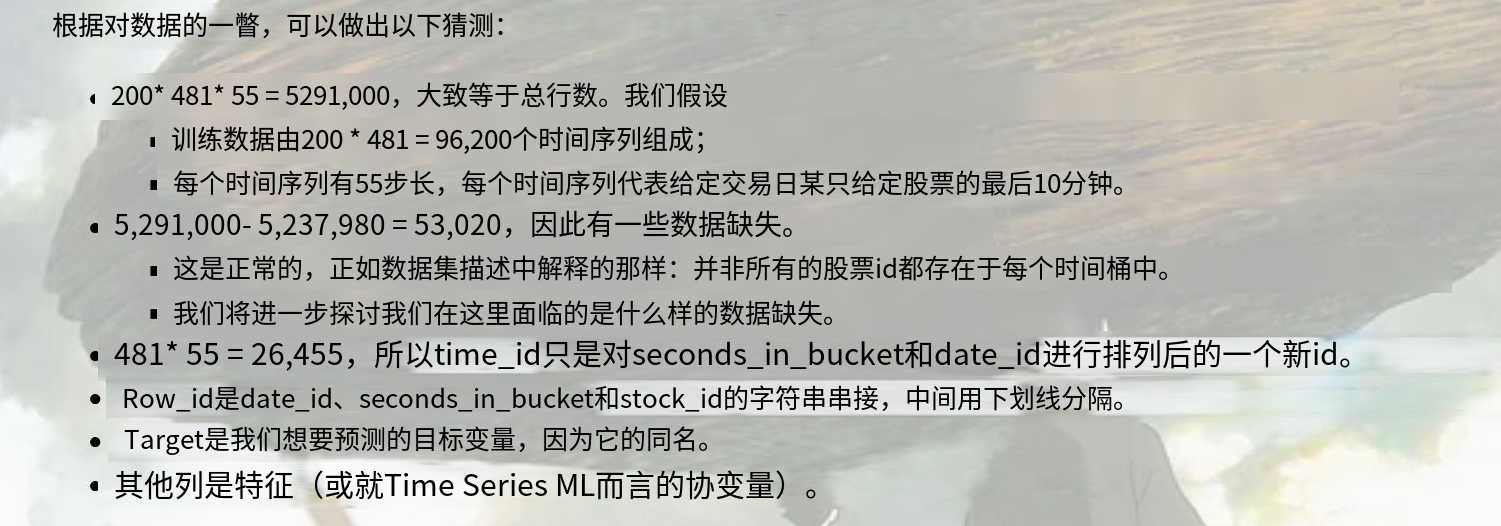

In [6]:
# Take a look at any single time series by setting the stock_id and date_id

stock_id = 6
date_id = 4

(Xy_train
    .query(f'stock_id == {stock_id} & date_id == {date_id}')
    .drop(columns=['stock_id', 'date_id', 'time_id', 'row_id'])
    .head(10)
)

seconds_in_bucket  imbalance_size  imbalance_buy_sell_flag  \
42026                  0       126061.42                   -1       
42218                 10        70729.12                   -1       
42410                 20        65917.61                   -1       
42602                 30       100079.30                   -1       
42794                 40            0.00                    0       
42986                 50            0.00                    0       
43178                 60            0.00                    0       
43370                 70            0.00                    0       
43562                 80            0.00                    0       
43754                 90            0.00                    0       

       reference_price  matched_size  far_price  near_price  bid_price  \
42026            1.000     4.550e+06        NaN         NaN      1.000   
42218            0.999     4.605e+06        NaN         NaN      0.998   
42410            0.999     4.610e+06        NaN         NaN      0.998   
42602            0.998     4.610e+06        NaN         NaN      0.998   
42794            0.999     4.710e+06        NaN         NaN      0.999   
42986            0.999     4.710e+06        NaN         NaN      0.999   
43178            0.999     4.710e+06        NaN         NaN      0.999   
43370            0.999     4.713e+06        NaN         NaN      0.999   
43562            0.999     4.713e+06        NaN         NaN      0.999   
43754            0.999     4.713e+06        NaN         NaN      0.999   

       bid_size  ask_price  ask_size    wap  target  
42026   1443.36      1.001  29387.97  1.000   -7.84  
42218  48012.00      1.000  48095.00  0.999    5.97  
42410    480.13      1.000  48095.00  0.998   16.19  
42602  48014.00      1.000  15870.03  0.999    2.18  
42794   6727.70      1.000   2887.32  1.000   -4.70  
42986  14417.40      1.000   4811.80  1.000   -2.91  
43178   4805.80      1.000   5292.98  0.999  -14.79  
43370   4805.80      1.000   5292.98  0.999  -12.59  
43562   4805.80      1.000   5292.98  0.999   -5.46  
43754   4805.80      1.000   7698.88  0.999  -10.62

In [7]:
def heatmap(df, stock_id, date_id):
    # A helper function to plot the time seires for a given stock in a given date
    cols = [
            'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price',
            'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size',
            'ask_price', 'ask_size', 'wap', 'target'
        ]
    if type(stock_id) == int:
        df_temp = (df
            .query(f'stock_id == {stock_id} & date_id == {date_id}')
            .loc[:, ['seconds_in_bucket'] + cols]
            # .replace(0, np.nan)
            .set_index('seconds_in_bucket')
        )
    else:
        df_temp = Xy_train[cols]
    correlation_matrix_interest = df_temp.corr()
    sns.heatmap(correlation_matrix_interest, annot=False, cmap='Purples', linewidths=0.0)
    plt.title(f'Stock {stock_id} on Day {date_id}')
    plt.show()

In [8]:
cols = [
            'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price',
            'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size',
            'ask_price', 'ask_size', 'wap', 'target'
        ]
correlation_matrix_interest = Xy_train[cols].corr()

In [9]:
# 临时设置不使用科学计数法，并且显示时保留5位小数
pd.options.display.float_format = '{:.5f}'.format
correlation_matrix_interest

imbalance_size  imbalance_buy_sell_flag  \
imbalance_size               1.00000             -0.01016       
imbalance_buy_sel...        -0.01016              1.00000       
reference_price             -0.00372              0.18210       
matched_size                 0.51237             -0.00600       
far_price                    0.00052              0.01801       
near_price                  -0.03093              0.50885       
bid_price                    0.00569              0.12958       
bid_size                     0.02114              0.03524       
ask_price                   -0.01277              0.13252       
ask_size                     0.02262             -0.01335       
wap                         -0.00349              0.13382       
target                      -0.00119              0.01510       

                      reference_price  matched_size  far_price  near_price  \
imbalance_size               -0.00372       0.51237    0.00052    -0.03093   
imbalance_buy_sel...          0.18210      -0.00600    0.01801     0.50885   
reference_price               1.00000       0.00772    0.01535     0.47359   
matched_size                  0.00772       1.00000   -0.00071    -0.00272   
far_price                     0.01535      -0.00071    1.00000     0.03152   
near_price                    0.47359      -0.00272    0.03152     1.00000   
bid_price                     0.98365       0.02356    0.01433     0.45837   
bid_size                      0.00727       0.07855    0.00223     0.03219   
ask_price                     0.98507      -0.00727    0.01467     0.46038   
ask_size                     -0.00653       0.07921   -0.00015    -0.01330   
wap                           0.98811       0.00828    0.01464     0.46258   
target                       -0.01739       0.00020   -0.00180     0.00604   

                      bid_price  bid_size  ask_price  ask_size      wap  \
imbalance_size          0.00569   0.02114   -0.01277   0.02262 -0.00349   
imbalance_buy_sel...    0.12958   0.03524    0.13252  -0.01335  0.13382   
reference_price         0.98365   0.00727    0.98507  -0.00653  0.98811   
matched_size            0.02356   0.07855   -0.00727   0.07921  0.00828   
far_price               0.01433   0.00223    0.01467  -0.00015  0.01464   
near_price              0.45837   0.03219    0.46038  -0.01330  0.46258   
bid_price               1.00000  -0.00110    0.97291  -0.00846  0.98928   
bid_size               -0.00110   1.00000    0.00651   0.27833  0.01807   
ask_price               0.97291   0.00651    1.00000  -0.00290  0.98891   
ask_size               -0.00846   0.27833   -0.00290   1.00000 -0.01869   
wap                     0.98928   0.01807    0.98891  -0.01869  1.00000   
target                 -0.02233  -0.01800   -0.02167   0.01494 -0.03517   

                       target  
imbalance_size       -0.00119  
imbalance_buy_sel...  0.01510  
reference_price      -0.01739  
matched_size          0.00020  
far_price            -0.00180  
near_price            0.00604  
bid_price            -0.02233  
bid_size             -0.01800  
ask_price            -0.02167  
ask_size              0.01494  
wap                  -0.03517  
target                1.00000

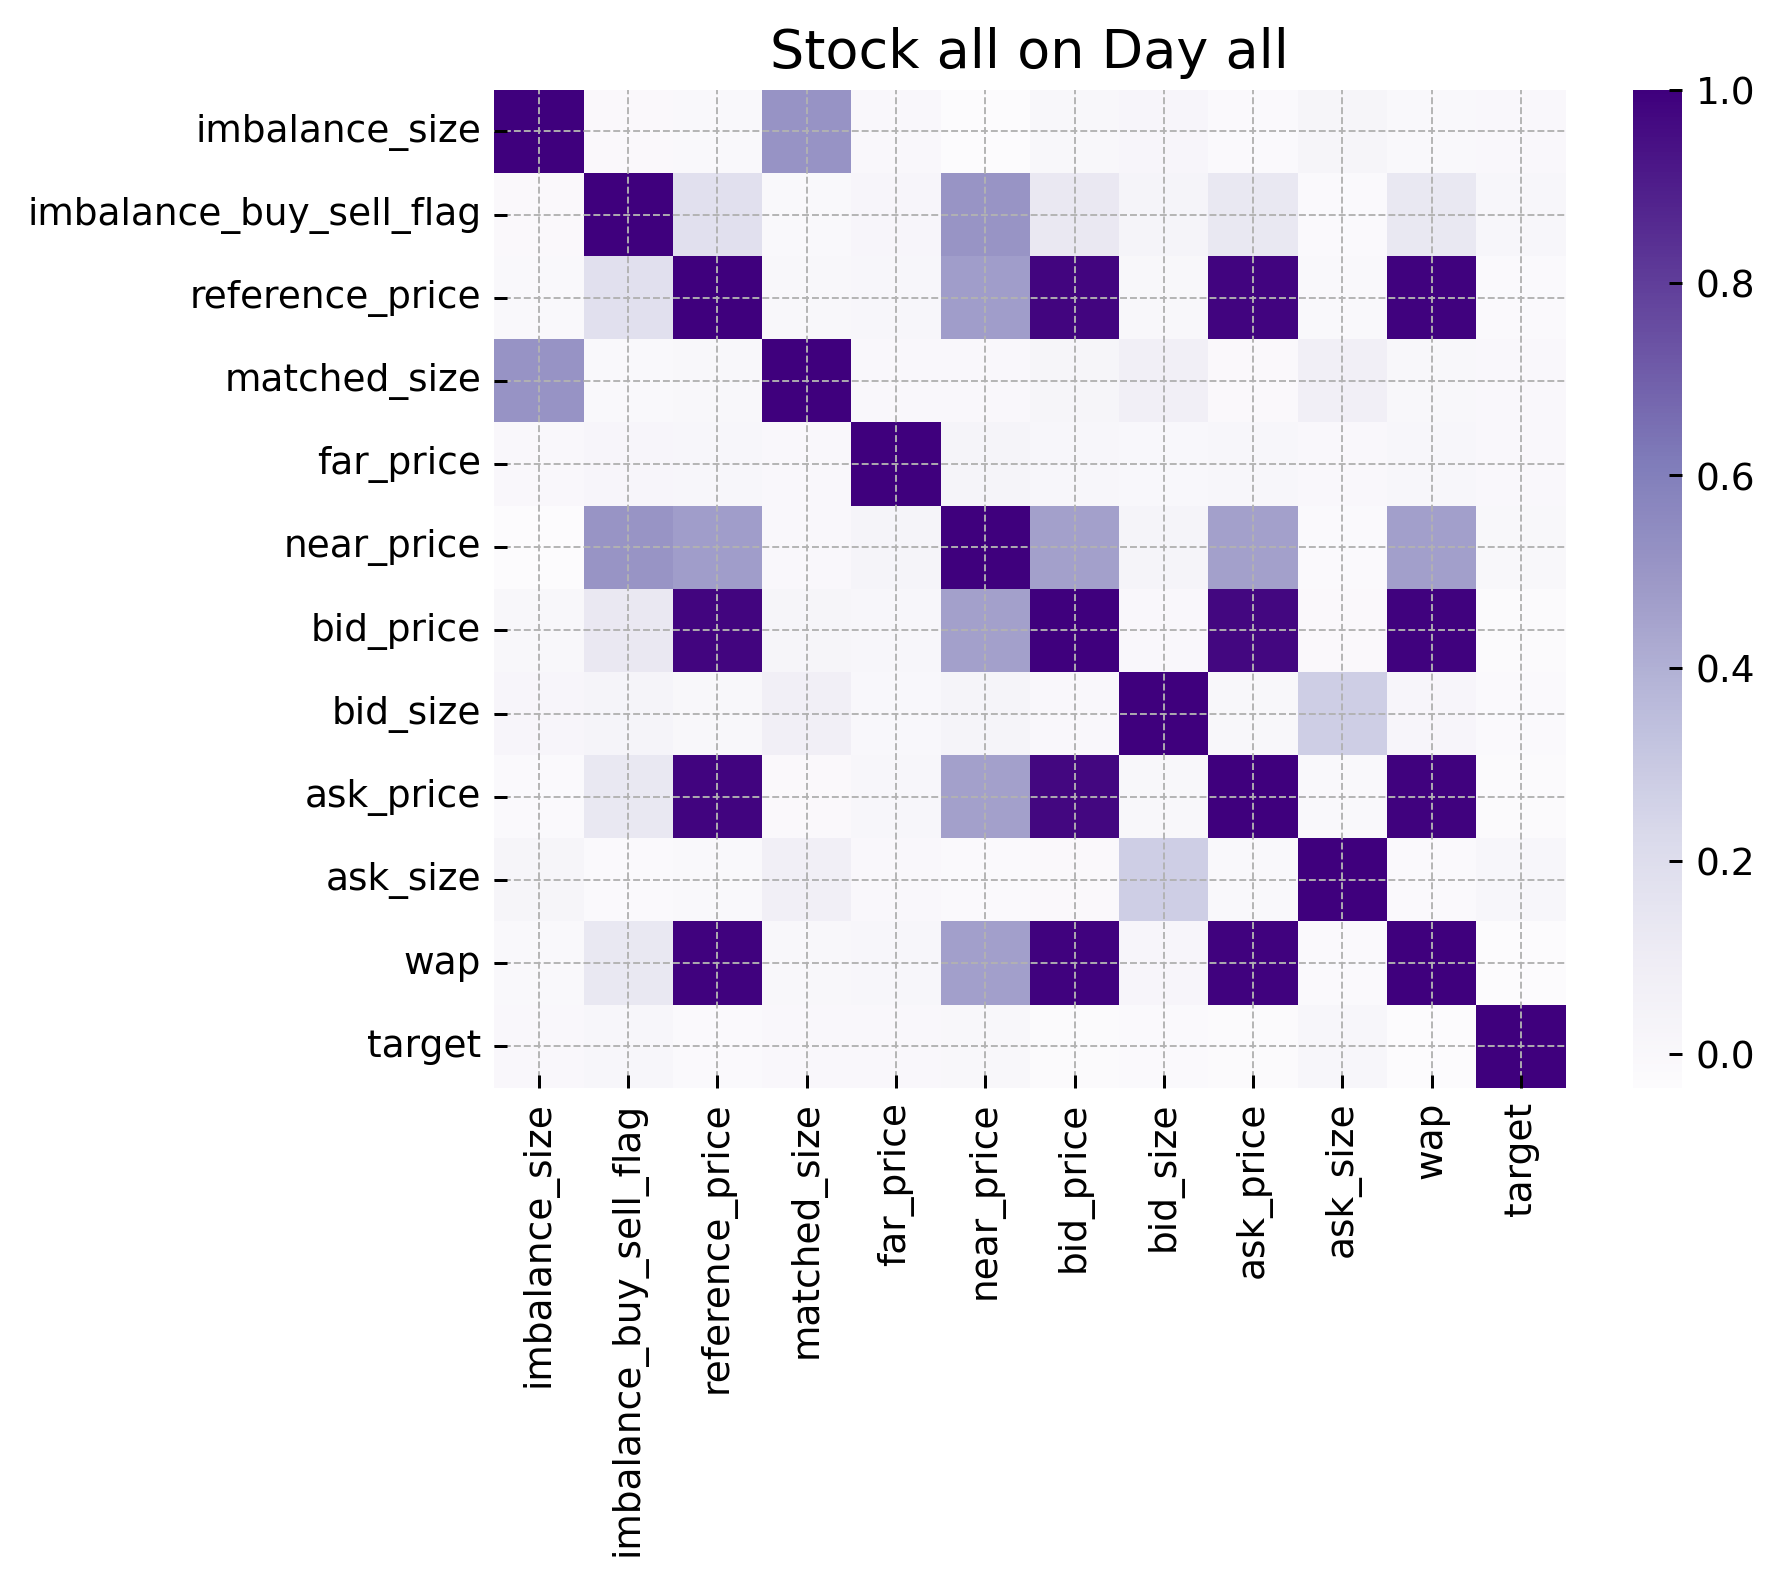

In [10]:
heatmap(Xy_train,
        stock_id='all',
        date_id='all')

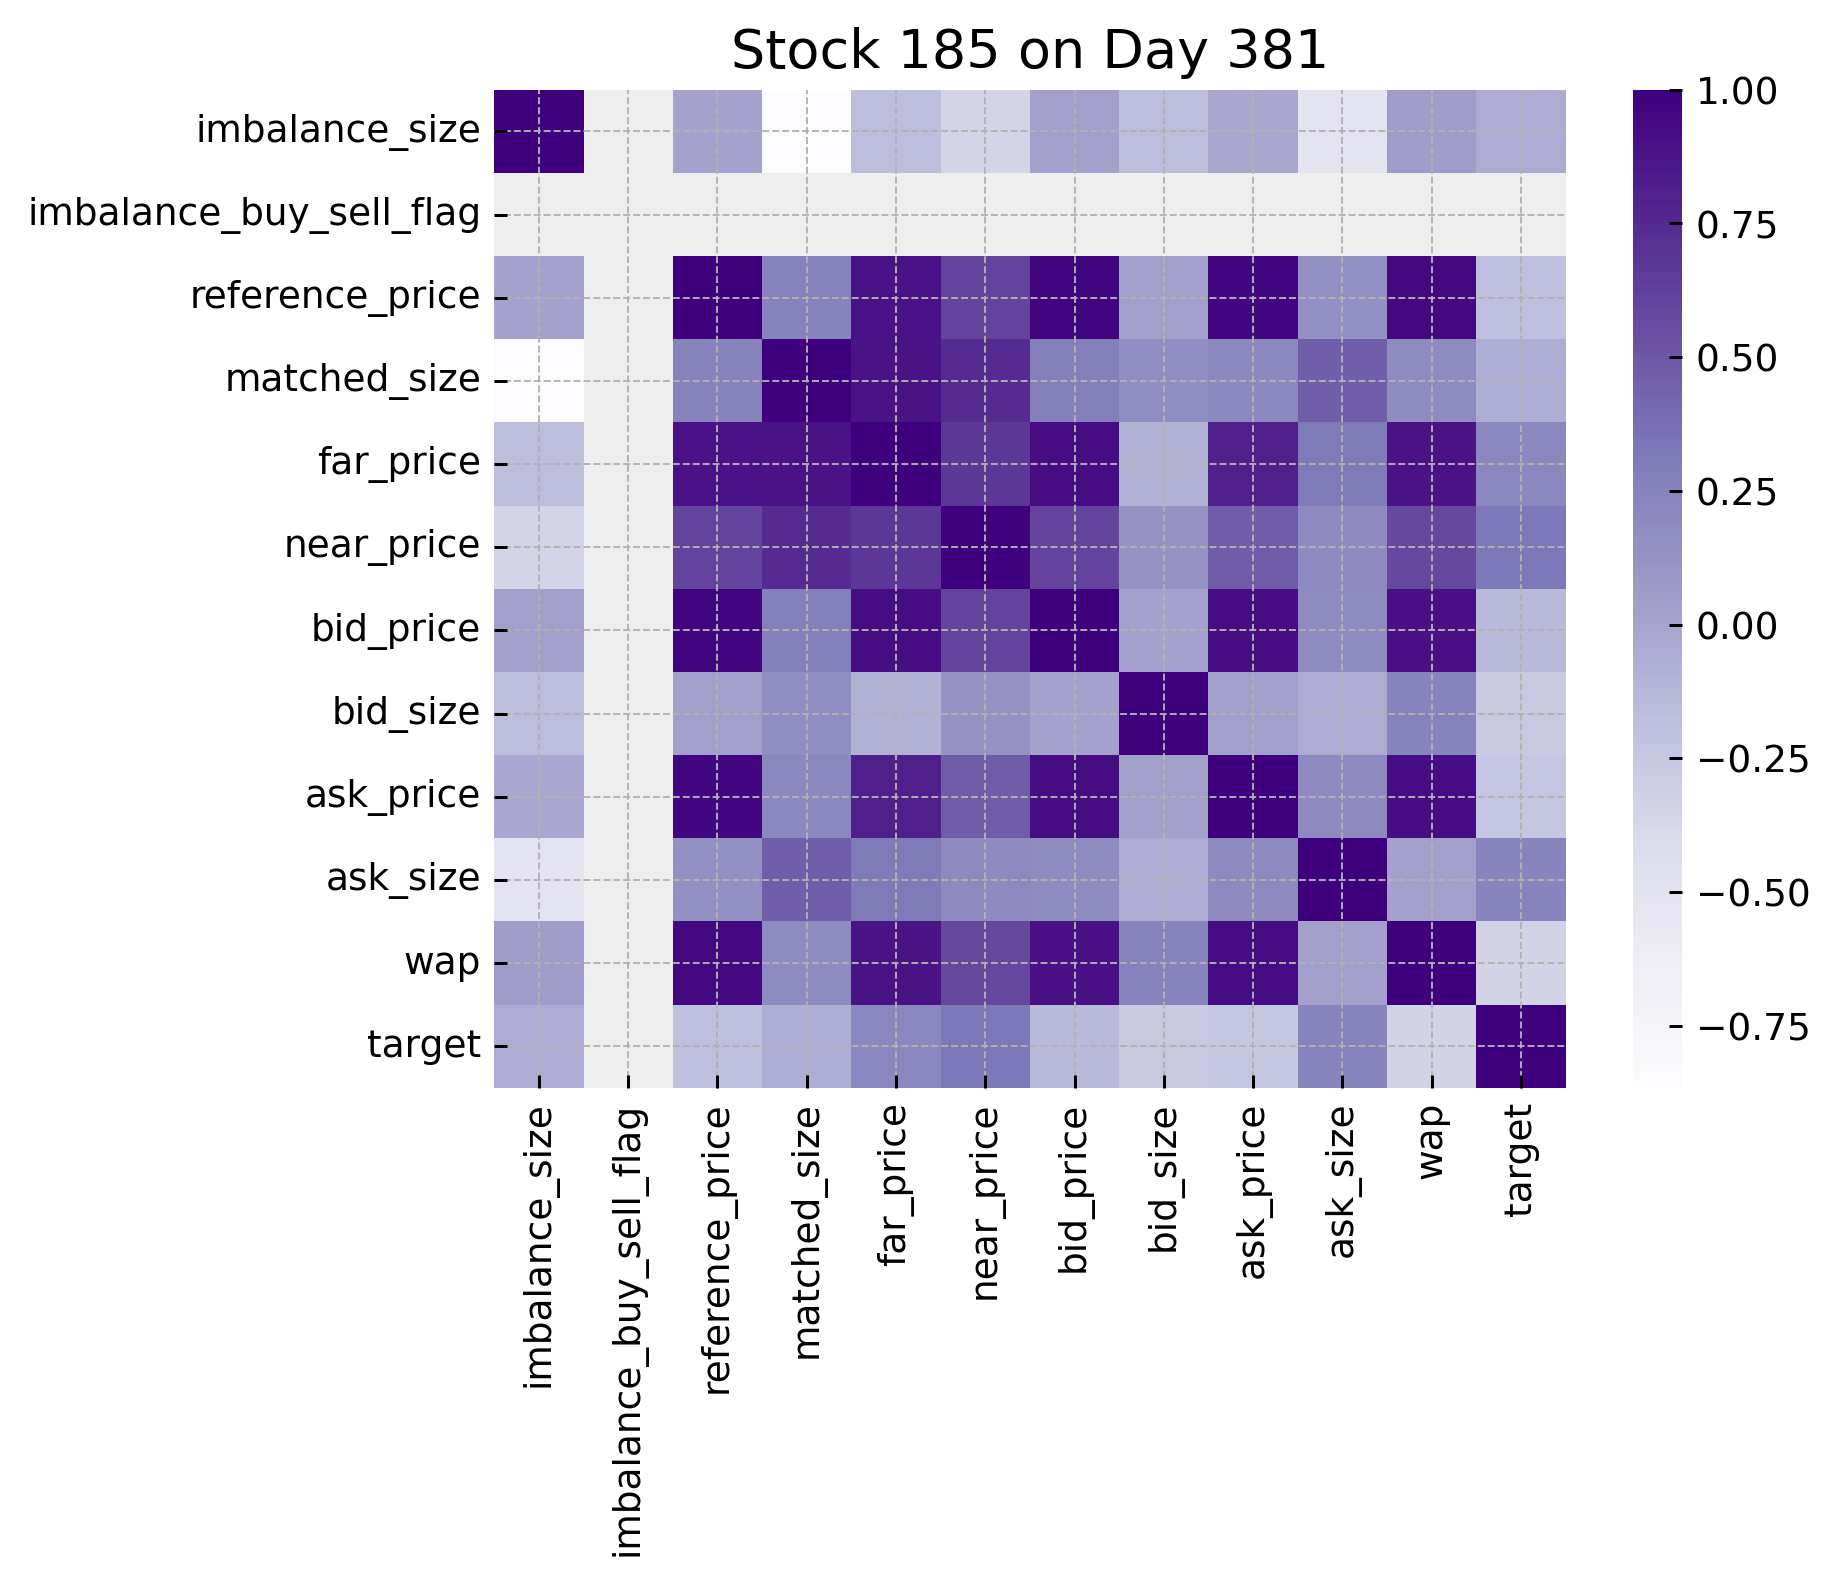

In [11]:
heatmap(Xy_train,
        stock_id=np.random.randint(low=0, high=200),
        date_id=np.random.randint(low=0, high=480))

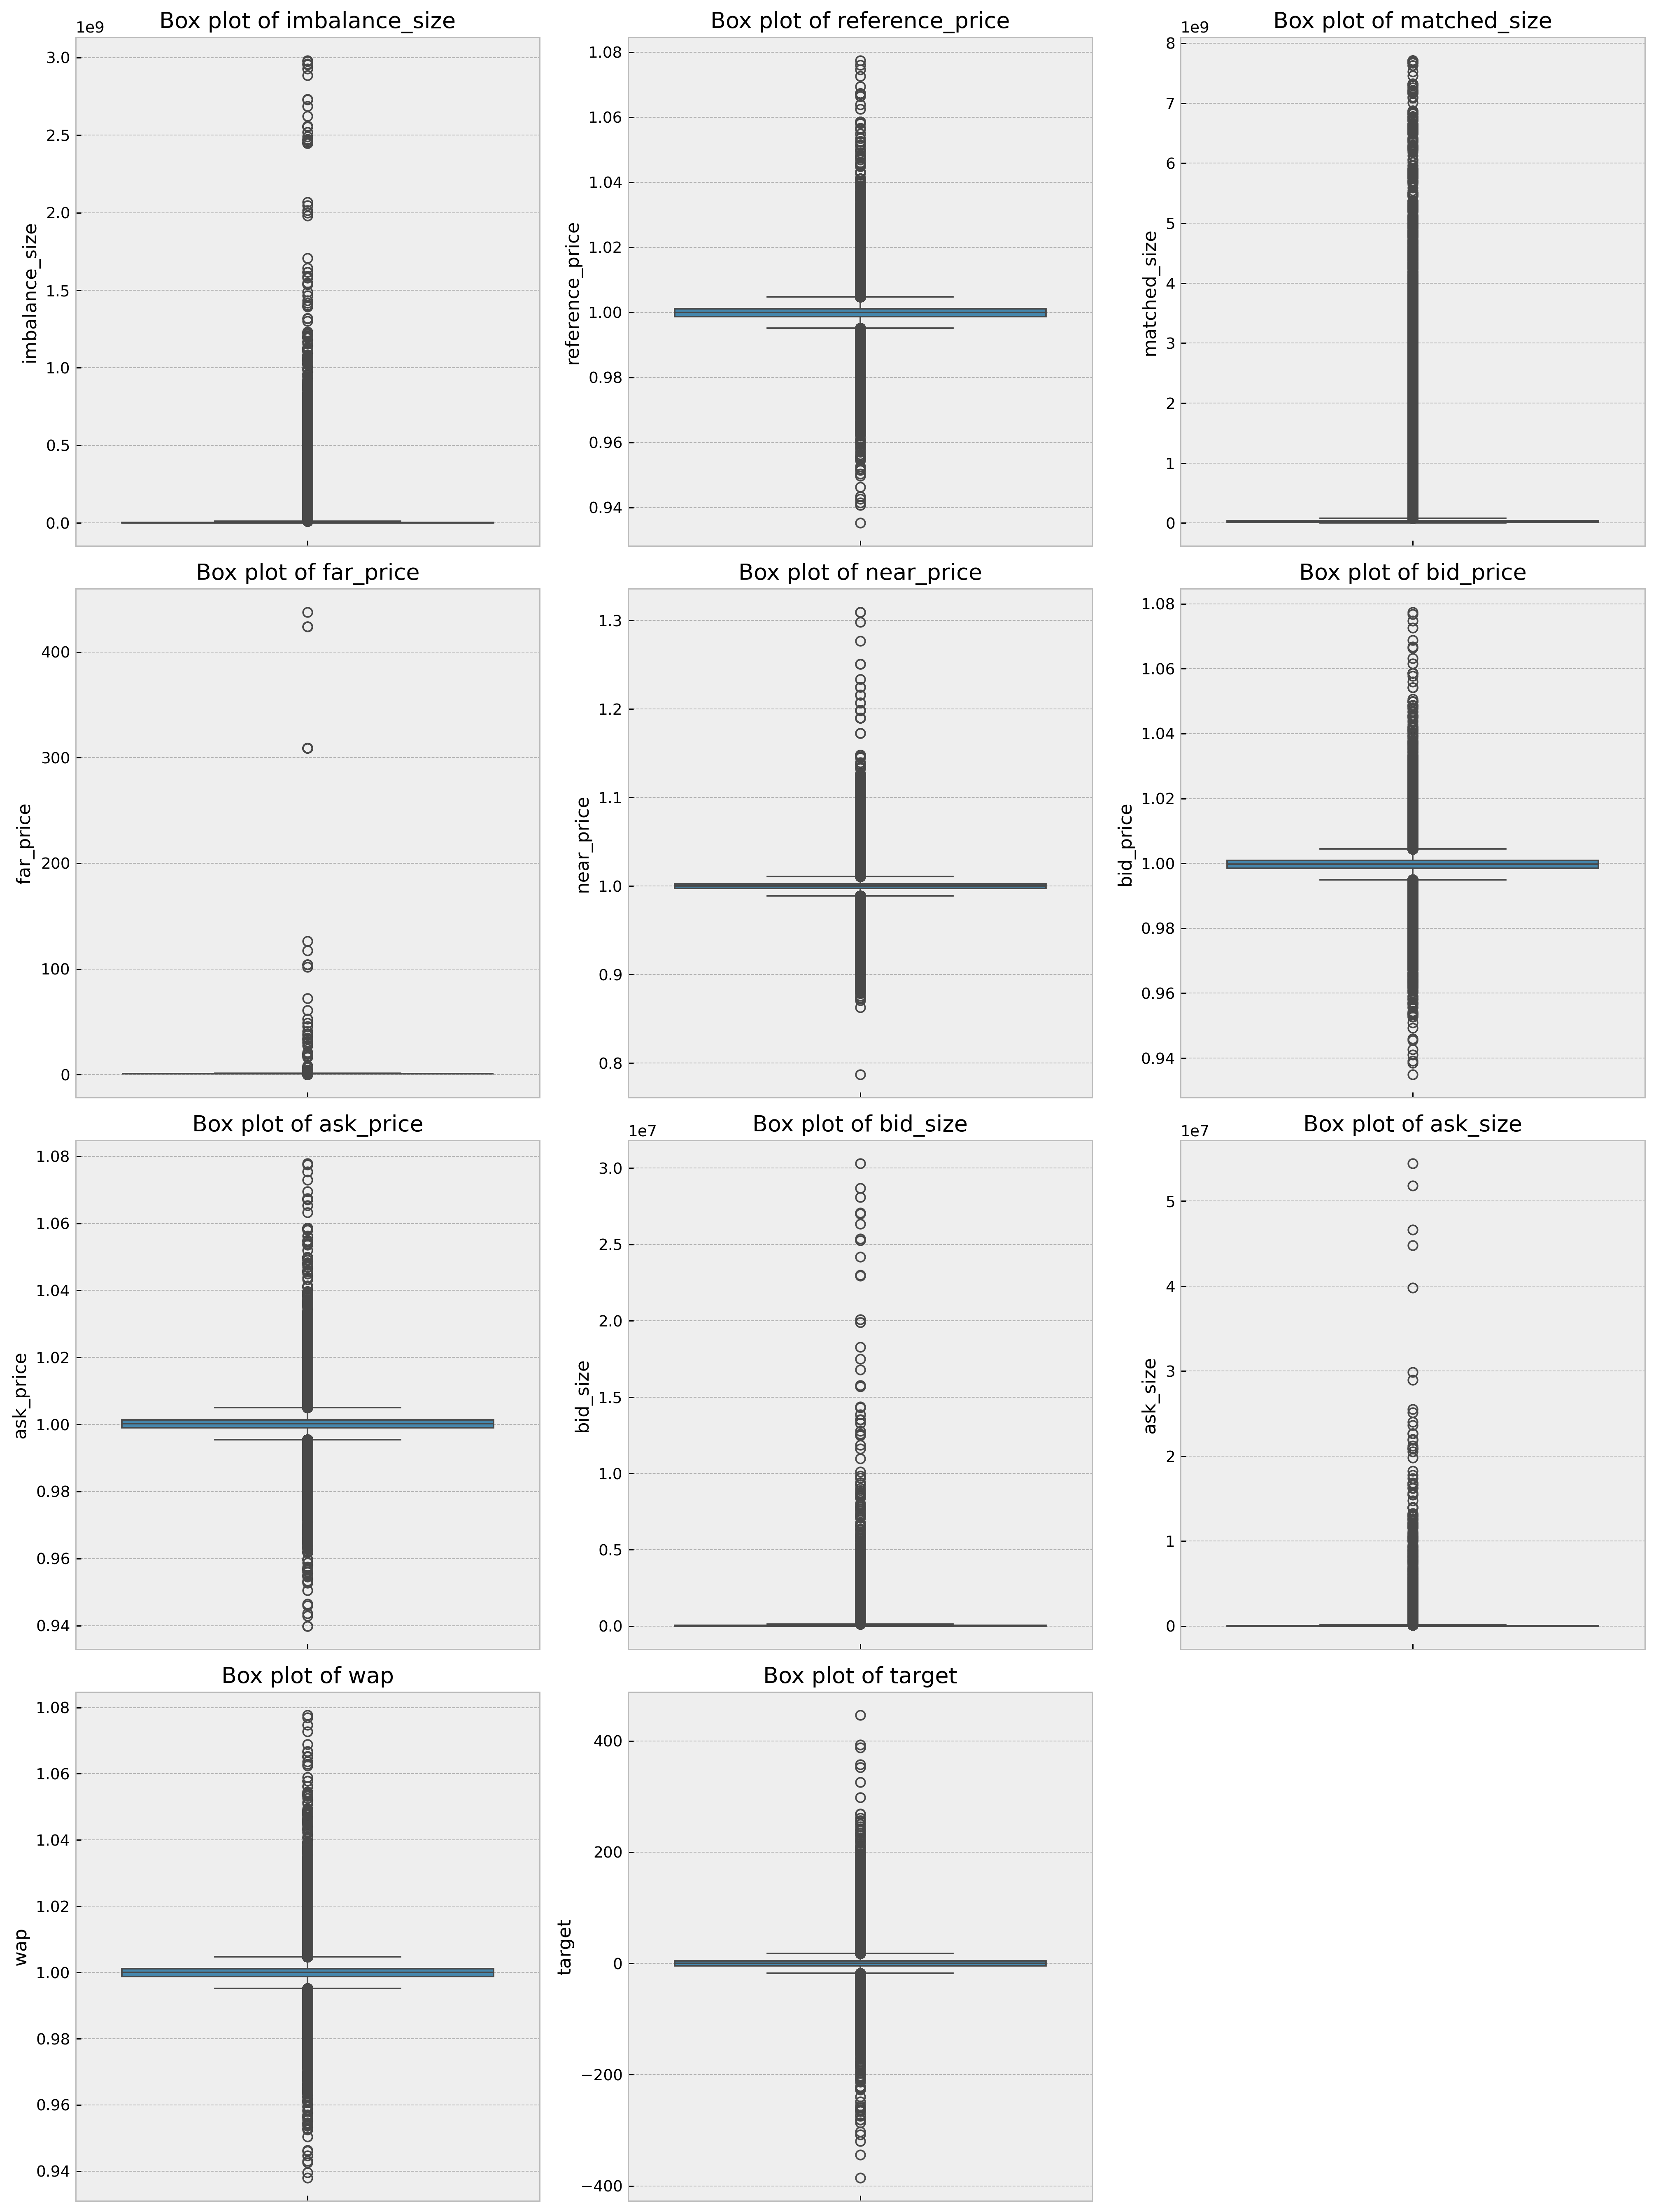

In [42]:
df = Xy_train
# 选择你想绘制箱线图的数值特征
numerical_features = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price',
                      'bid_price', 'ask_price', 'bid_size', 'ask_size', 'wap', 'target']

# 使用seaborn绘制箱线图
plt.figure(figsize=(15, 20))  # 设置画布大小
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)  # 假设有12个特征，排列成4x3的子图
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)

# 调整布局
plt.tight_layout()
plt.show()

In [54]:
Xy_train['imbalance_buy_sell_flag'].value_counts()

imbalance_buy_sell_flag
-1    2084349
 1    2022037
 0    1131594
Name: count, dtype: int64

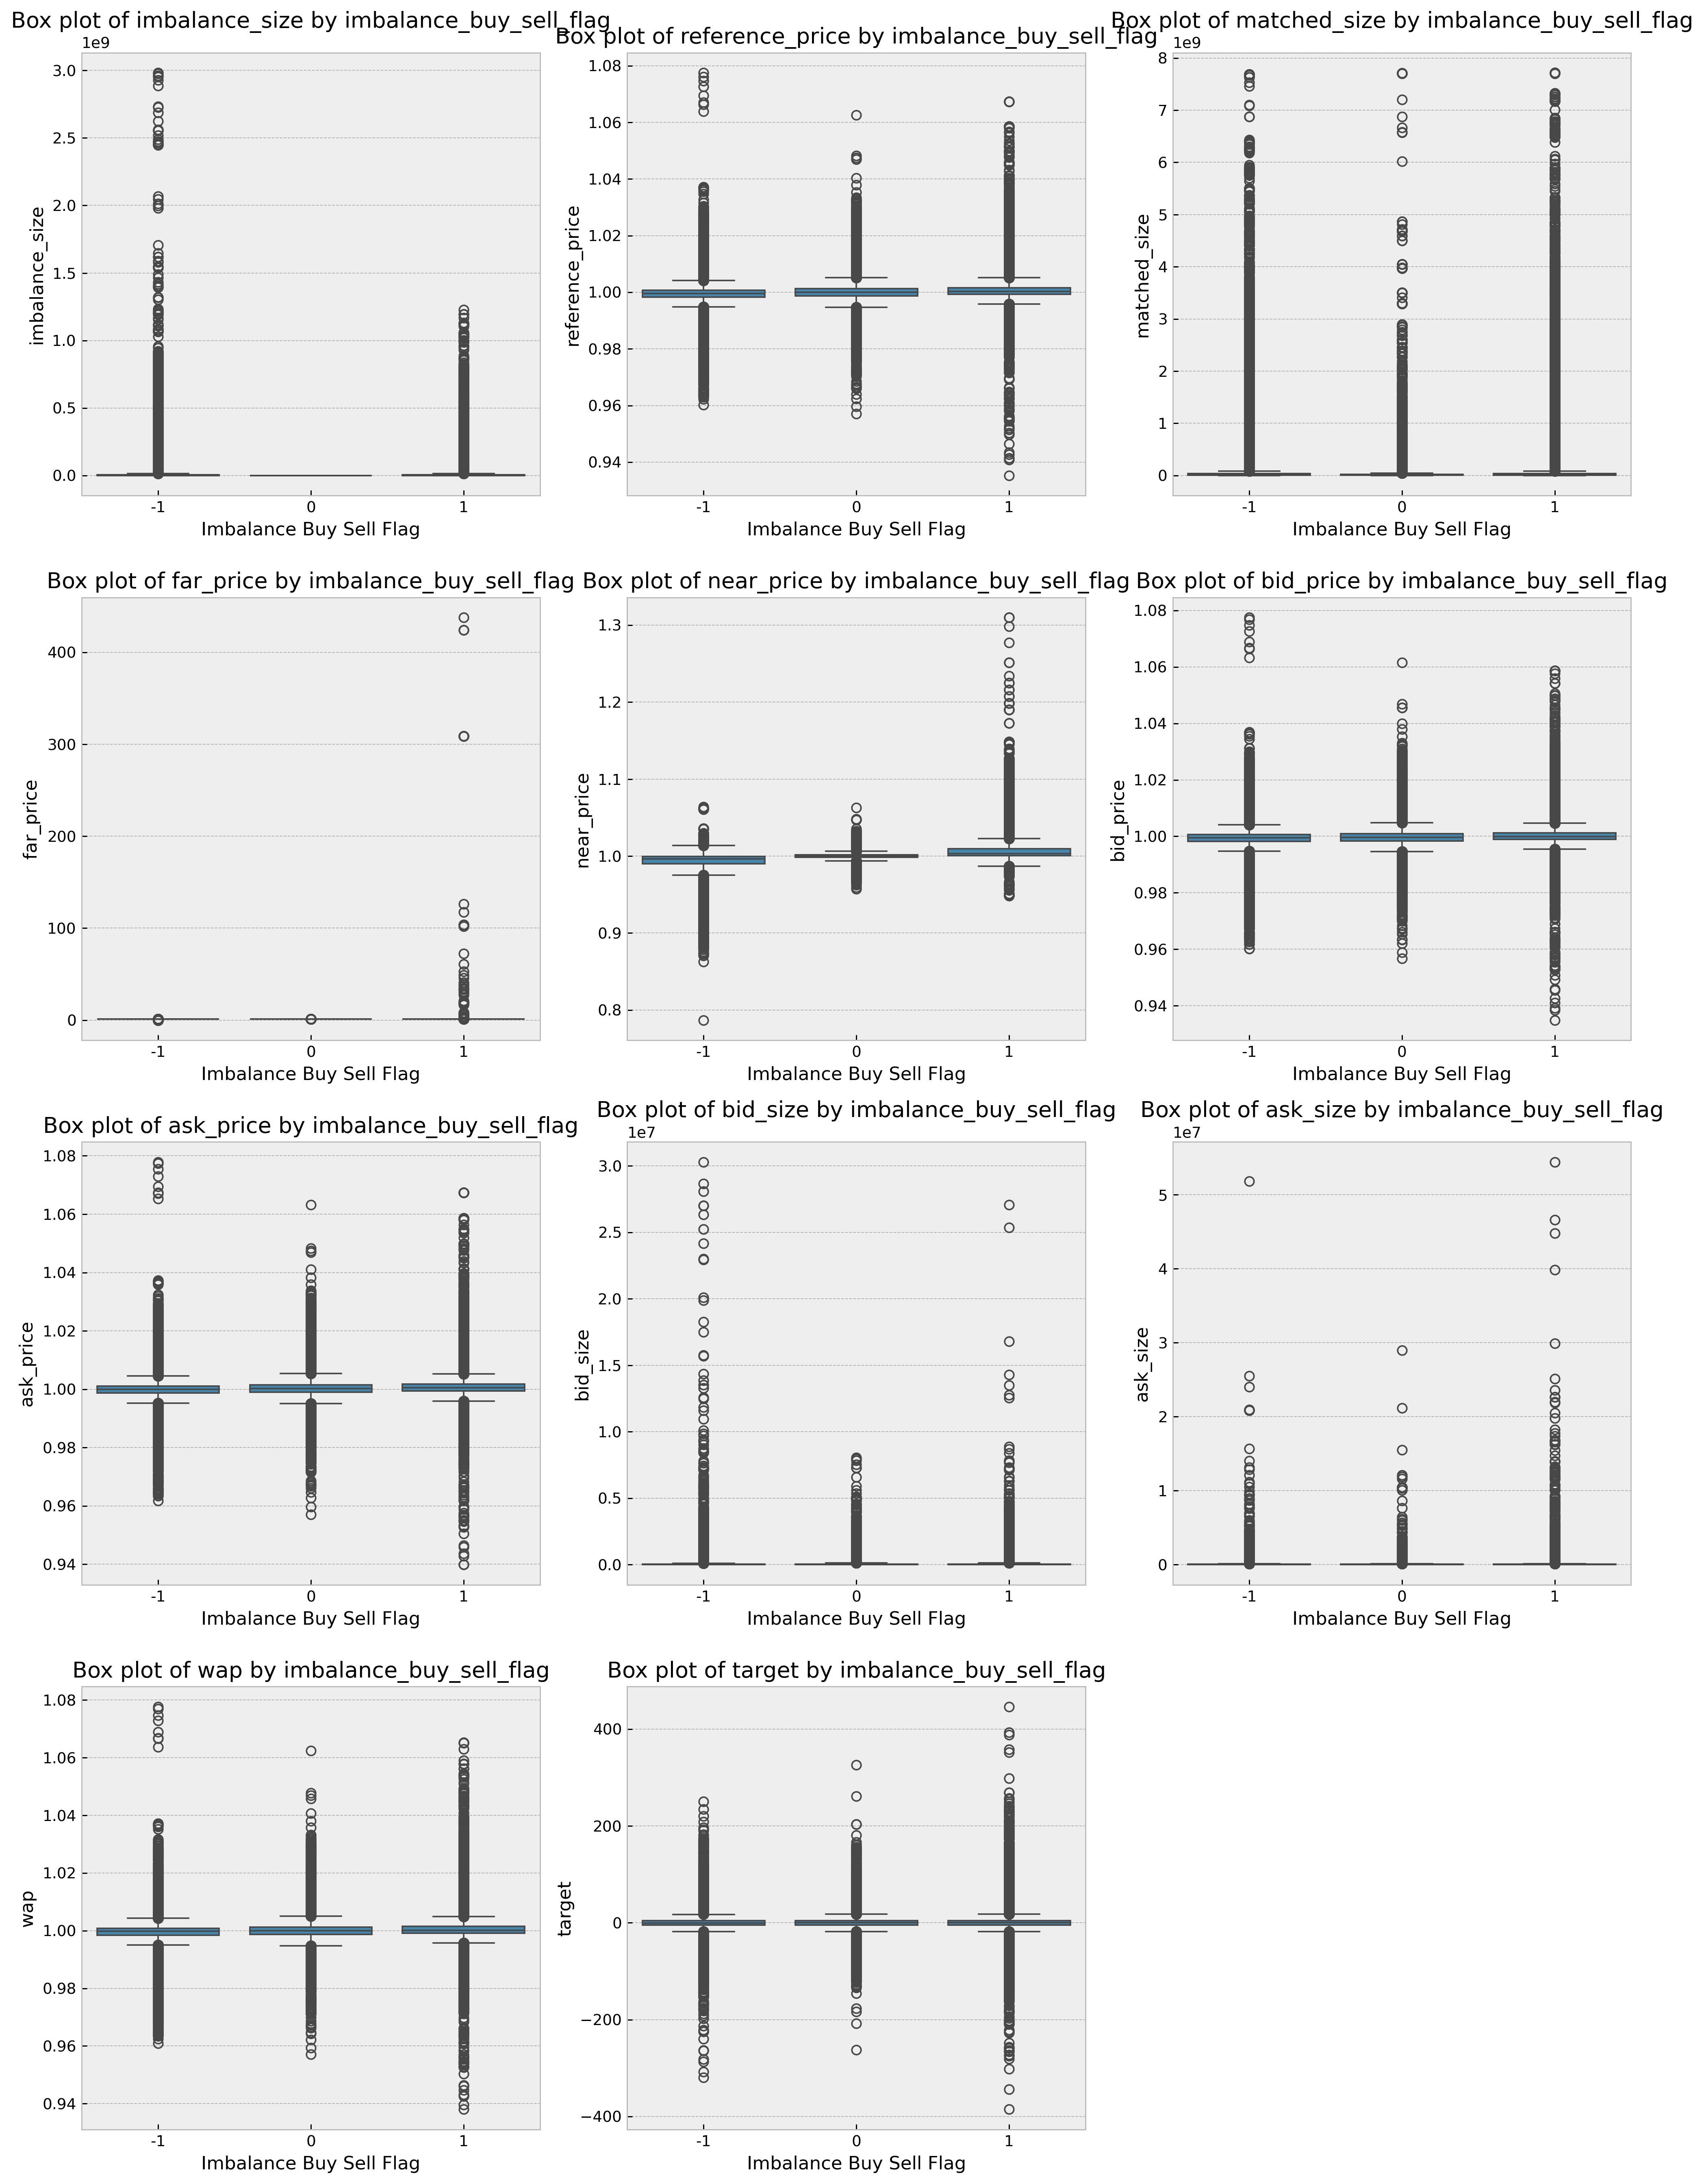

In [43]:
# 绘制imbalance_buy_sell_flag下各特征的箱线图
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='imbalance_buy_sell_flag', y=feature, data=df)
    plt.title(f'Box plot of {feature} by imbalance_buy_sell_flag')
    plt.xlabel('Imbalance Buy Sell Flag')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [44]:
def boxplot(df_all, stock_id, date_id):
    df = df_all.query(f'stock_id == {stock_id} & date_id == {date_id}')
    numerical_features = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price',
                      'bid_price', 'ask_price', 'bid_size', 'ask_size', 'wap', 'target']

    # 使用seaborn绘制箱线图
    plt.figure(figsize=(15, 20))  # 设置画布大小
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(4, 3, i)  # 假设有12个特征，排列成4x3的子图
        sns.boxplot(y=df[feature])
        plt.title(f'Box plot of {feature}')
        plt.ylabel(feature)
    # 调整布局
    plt.tight_layout()
    plt.show()

In [56]:
boxplot(Xy_train, 1, 2)

In [48]:
def clf_boxplot(df_all, stock_id, date_id):
    # 绘制imbalance_buy_sell_flag下各特征的箱线图
    df = df_all.query(f'stock_id == {stock_id} & date_id == {date_id}')
    numerical_features = ['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price',
                      'bid_price', 'ask_price', 'bid_size', 'ask_size', 'wap', 'target']
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x='imbalance_buy_sell_flag', y=feature, data=df)
        plt.title(f'Box plot of {feature} by imbalance_buy_sell_flag')
        plt.xlabel('Imbalance Buy Sell Flag')
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

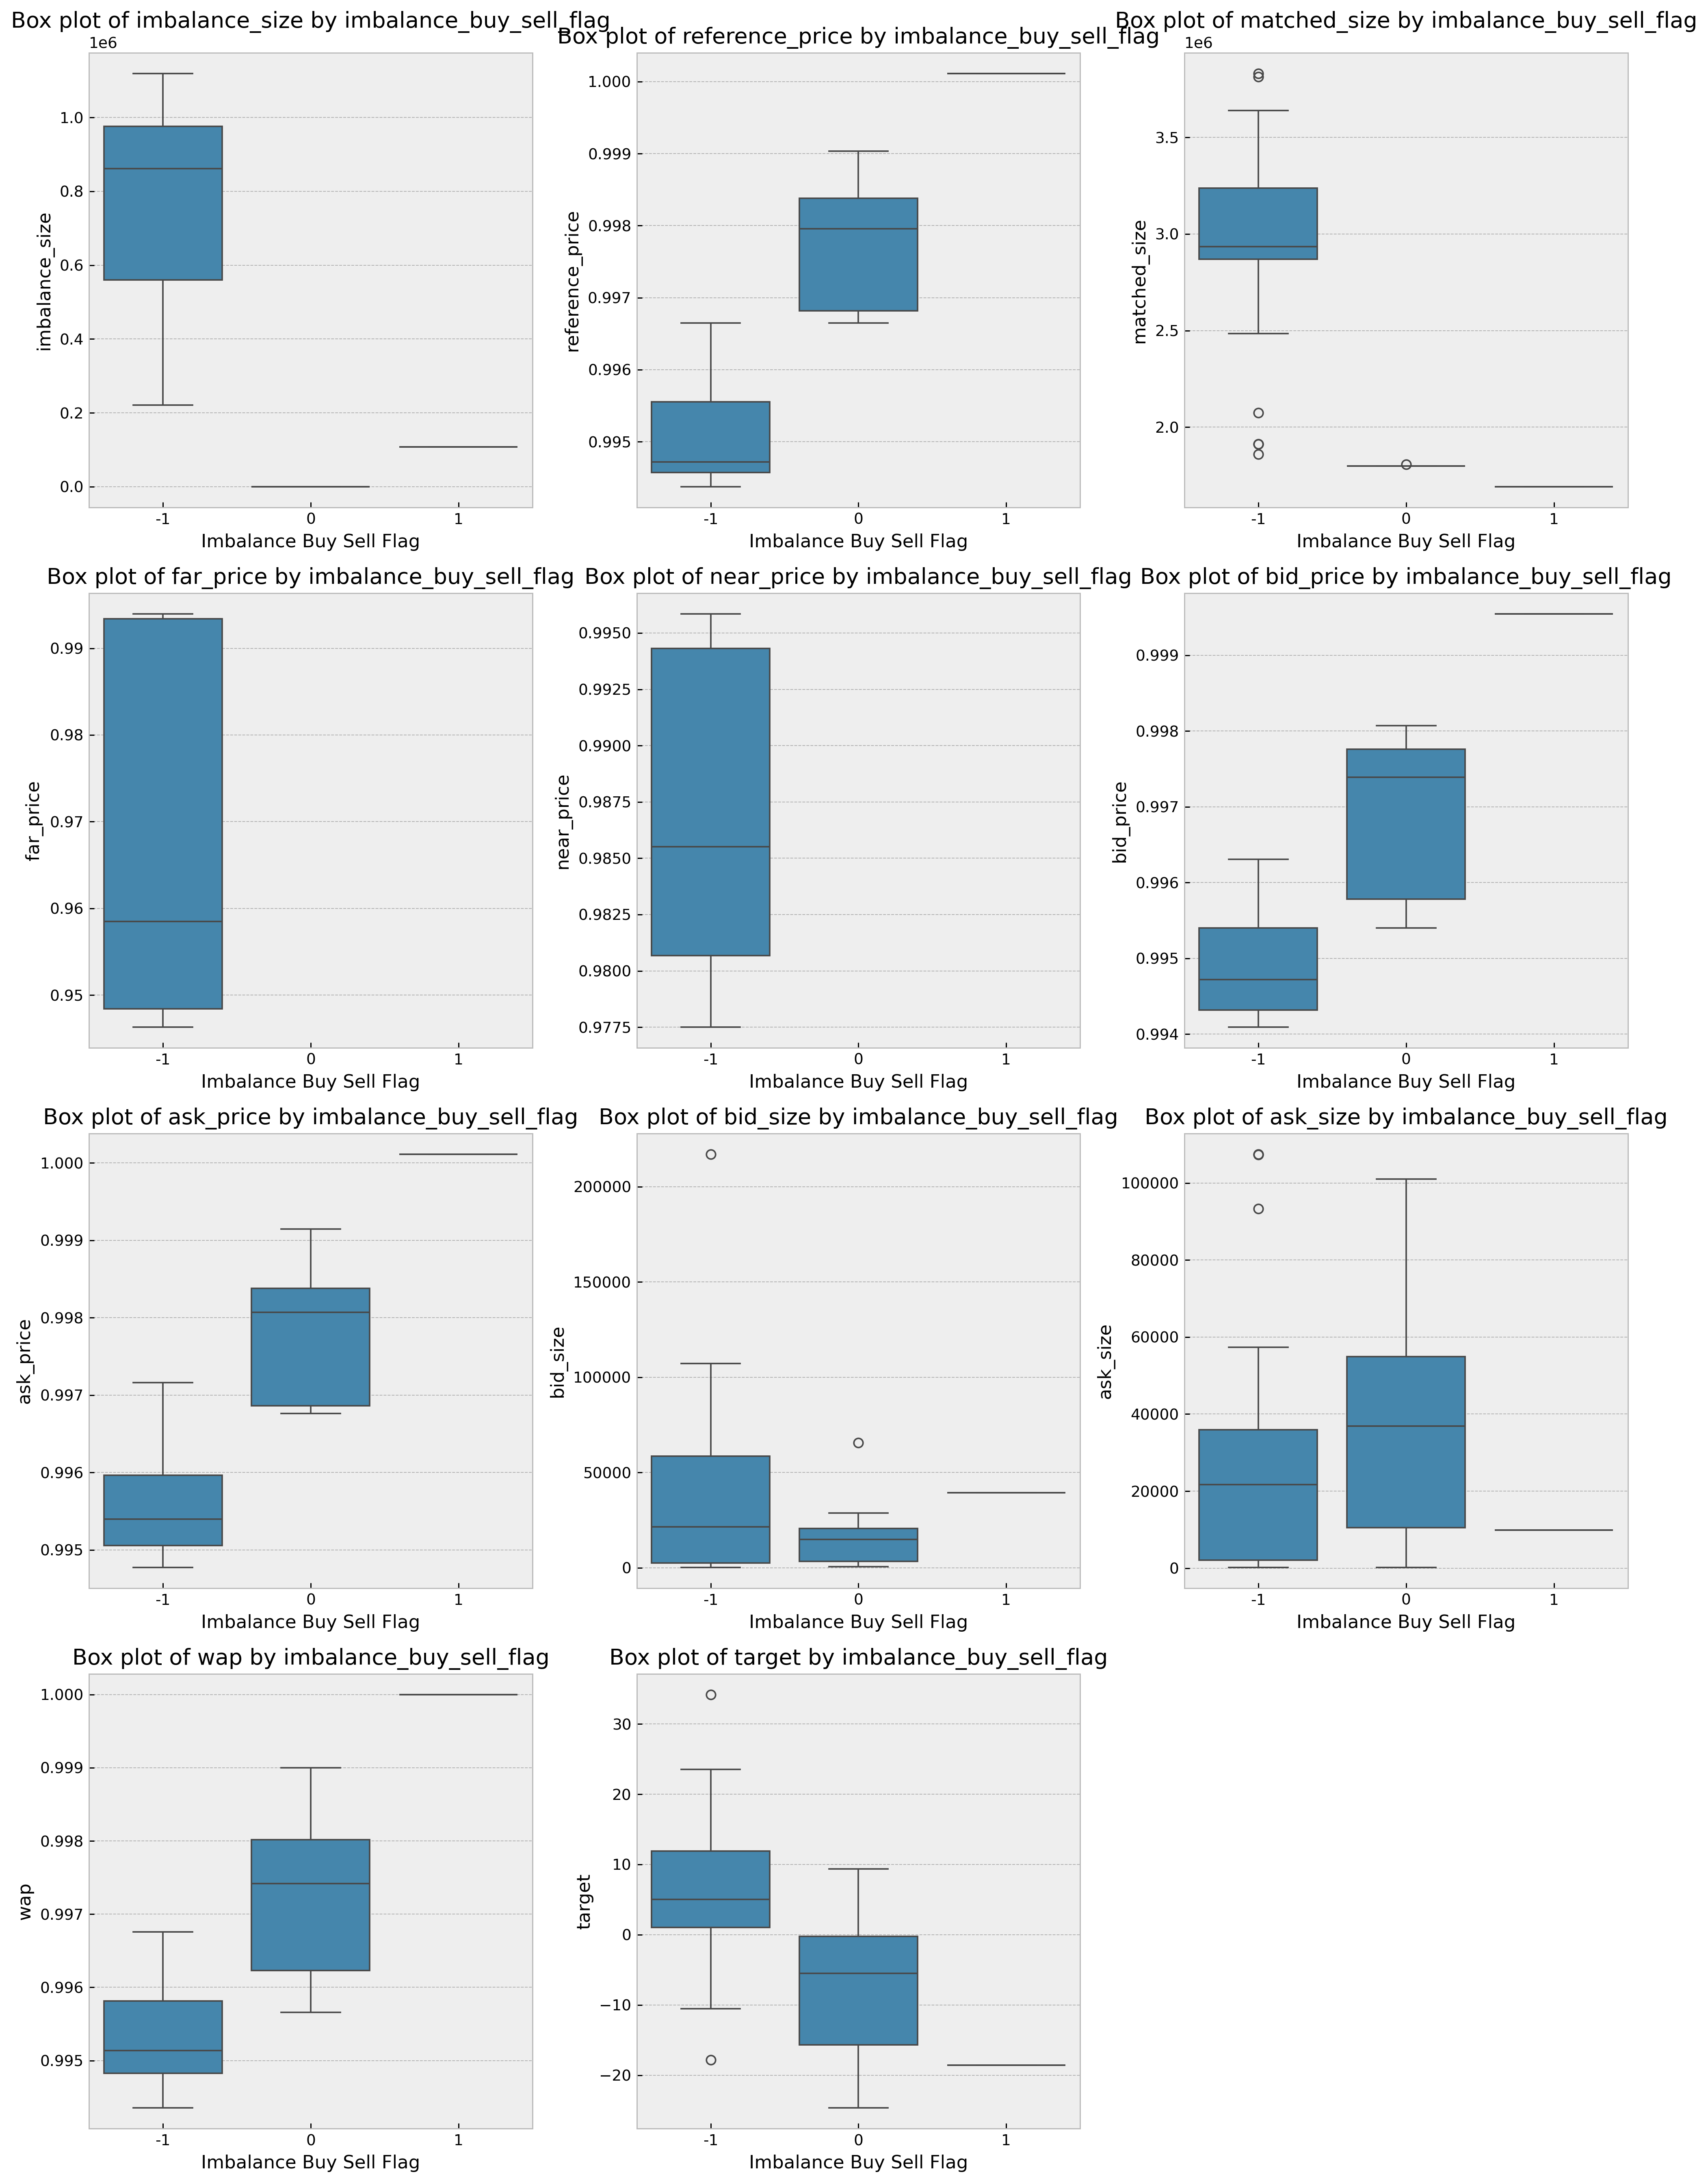

In [49]:
clf_boxplot(Xy_train, 1, 2)

### 1.1.2. What type of data missing?

There are 3 types of data missing in the world of Time Series:

1. Are there some time series are missing entirely (e.g., some stocks have no data at all on some days)? 

2. Are some time series are missing their steps (e.g., some time series have steps less than 55)?

3. Both?

**The answer to these questions are crucial to our later model building.**

In [12]:
# Let's first exam if all the time series are 55 steps long

(Xy_train
    .groupby(['stock_id', 'date_id'])
    ['seconds_in_bucket'] # Extract the column of interest
    .count() # Count the number of rows in each permutation of stock_id and date_id
    .apply(lambda x: x == 55) # Check if every count is 55
    .all() # Check if all the booleans are True
)

True

The above result suggests that all the time series in our training data are of the same length of 55.

Therefore, it can be concluded that **there are some stocks missing data on some days entirely**.

phew! That's a relief.

From my past experiences, many time series each with a few irregular lose steps are way harder to deal with than a few time series missing entirely while other time series are whole.

Fortunately, that kind of problem is not the case here. 

Next, let's keep exploring which stocks are missing data on which days?

In [13]:
all_stock_id = np.sort(Xy_train["stock_id"].unique())
print(all_stock_id[:10])
print(all_stock_id[-10:])

[0 1 2 3 4 5 6 7 8 9]
[190 191 192 193 194 195 196 197 198 199]


In [14]:
all_date_id = np.sort(Xy_train["date_id"].unique())
print(all_date_id[:10])
print(all_date_id[-10:])

[0 1 2 3 4 5 6 7 8 9]
[471 472 473 474 475 476 477 478 479 480]


In [16]:
# Make a MultiIndex object from the cartesian product of all possible combinations.
multi_index = pd.MultiIndex.from_product(
    iterables=[all_date_id, all_stock_id], 
    names=["date_id", "stock_id"]
)

# To get the all missing data.
# join the MultiIndex with the Trianing data,
# and then filter out all the rows that are not in the training data.
missing_data = (Xy_train
    .loc[:, ["date_id", "stock_id"]]
    .assign(in_train=True) # Add a new column to indicate if the row is in the training data
    .set_index(["date_id", "stock_id"])
    .merge(multi_index.to_frame(), how="right", left_index=True, right_index=True)
    .query("in_train.isna()") # Filter out the missing data
    .set_index("stock_id", drop=True)
    ["date_id"]
)

# A Series object for missing data
missing_data

stock_id
69       0
78       0
79       0
102      0
135      0
      ... 
102    291
102    292
102    293
102    294
73     320
Name: date_id, Length: 964, dtype: int64

In [17]:
# Show all the stock_id that have at least 1 day of missing data
missing_data.index.unique()

Index([69, 78, 79, 102, 135, 150, 153, 156, 199, 99, 73], dtype='int64', name='stock_id')

In [18]:
# See which date's data are missing for a specific stock_id
stock_id = 78 # change this
missing_data[stock_id]

stock_id
78    0
78    1
78    2
78    3
Name: date_id, dtype: int64

In [19]:
# A summary of the of missing date counts for each stock_id
missing_data.groupby("stock_id").count().sort_values()

stock_id
73       1
99       1
78       4
69      37
156     37
150     59
153     70
199     88
79     181
135    191
102    295
Name: date_id, dtype: int64

`stock_id = 73` is missing 1 day of data, and `stock_id = 102` is missing 295 days of data, and so forth.

## 1.2. Understand the features

In [20]:
def time_series_plot(df, cols, stock_id, date_id):
    # A helper function to plot the time seires for a given stock in a given date
    (df
        .query(f'stock_id == {stock_id} & date_id == {date_id}')
        .loc[:, ['seconds_in_bucket'] + cols]
        # .replace(0, np.nan)
        .set_index('seconds_in_bucket')
        .plot(title=f'Stock {stock_id} on Day {date_id}', figsize=(10, 4), linewidth=1)
    )

### 1.2.1 Order book

We need to first understand the concept of **Order book** to understand following features:

- `bid_price`
- `ask_price`
- `bid_size`
- `ask_size`
- `wap`

So, what is an order book?

![](https://i.ibb.co/sqVfdLm/order-book-1.png)

Above picture is a demo of an Order Book,

- We can see that at a price level of 9 there are 2 shares on the **bid**, meaning the market participants are willing to **buy** 2 shares for a price of 9.

- We can also see that at a price level of 10 there is 1 share on the **ask**, meaning market participants are willing to **sell** 1 share for a price of 10.

![](https://i.ibb.co/WHMX37t/order-book-2.png)

If someone were to put in an ask of 10 shares at a price of 9, then 2 shares would be **matched**. The new best ask would be 8 shares at a price of 9, the new state of the book is displayed above.

-----

According to the [Dataset Description](https://www.kaggle.com/competitions/optiver-trading-at-the-close/data):

- `bid_price` & `ask_price` - Price of the most competitive buy/sell level in the non-auction book.

- `bid_size` & `ask_size` - The _dollar notional_ amount on the most competitive buy/sell level in the non-auction book.

- `wap` - The weighted average price in the non-auction book.

$$
\frac{ {BidPrice * AskSize + AskPrice * BidSize}}{BidSize + AskSize}
$$

Other than `wap`, the other 4 features are self-explanatory.

To understand `wap` _intuitively_, we have did some researches on the formula and found the following properties:

- `wap` is always larger than `bid_price` and smaller `ask_price`.

- If `bid_size` is larger than `ask_size`, then `wap` would be closer to `ask_price`, and vice versa.

In other words, an increase in `bid_size` / `ask_size` would "push" the `wap` toward opposite direction, but `wap` would always stays in the gap between `bid_price` and `ask_price`.

**Basically, `wap` serve as a decent guess of the _fair price_ of a stock**: If the `bid_size` increase, the buyers are more aggressive, so the _fair price_ should be closer to the `ask_price`. It makes intuitive sense, right?

Now we draw some time series plots to confirm our speculations:

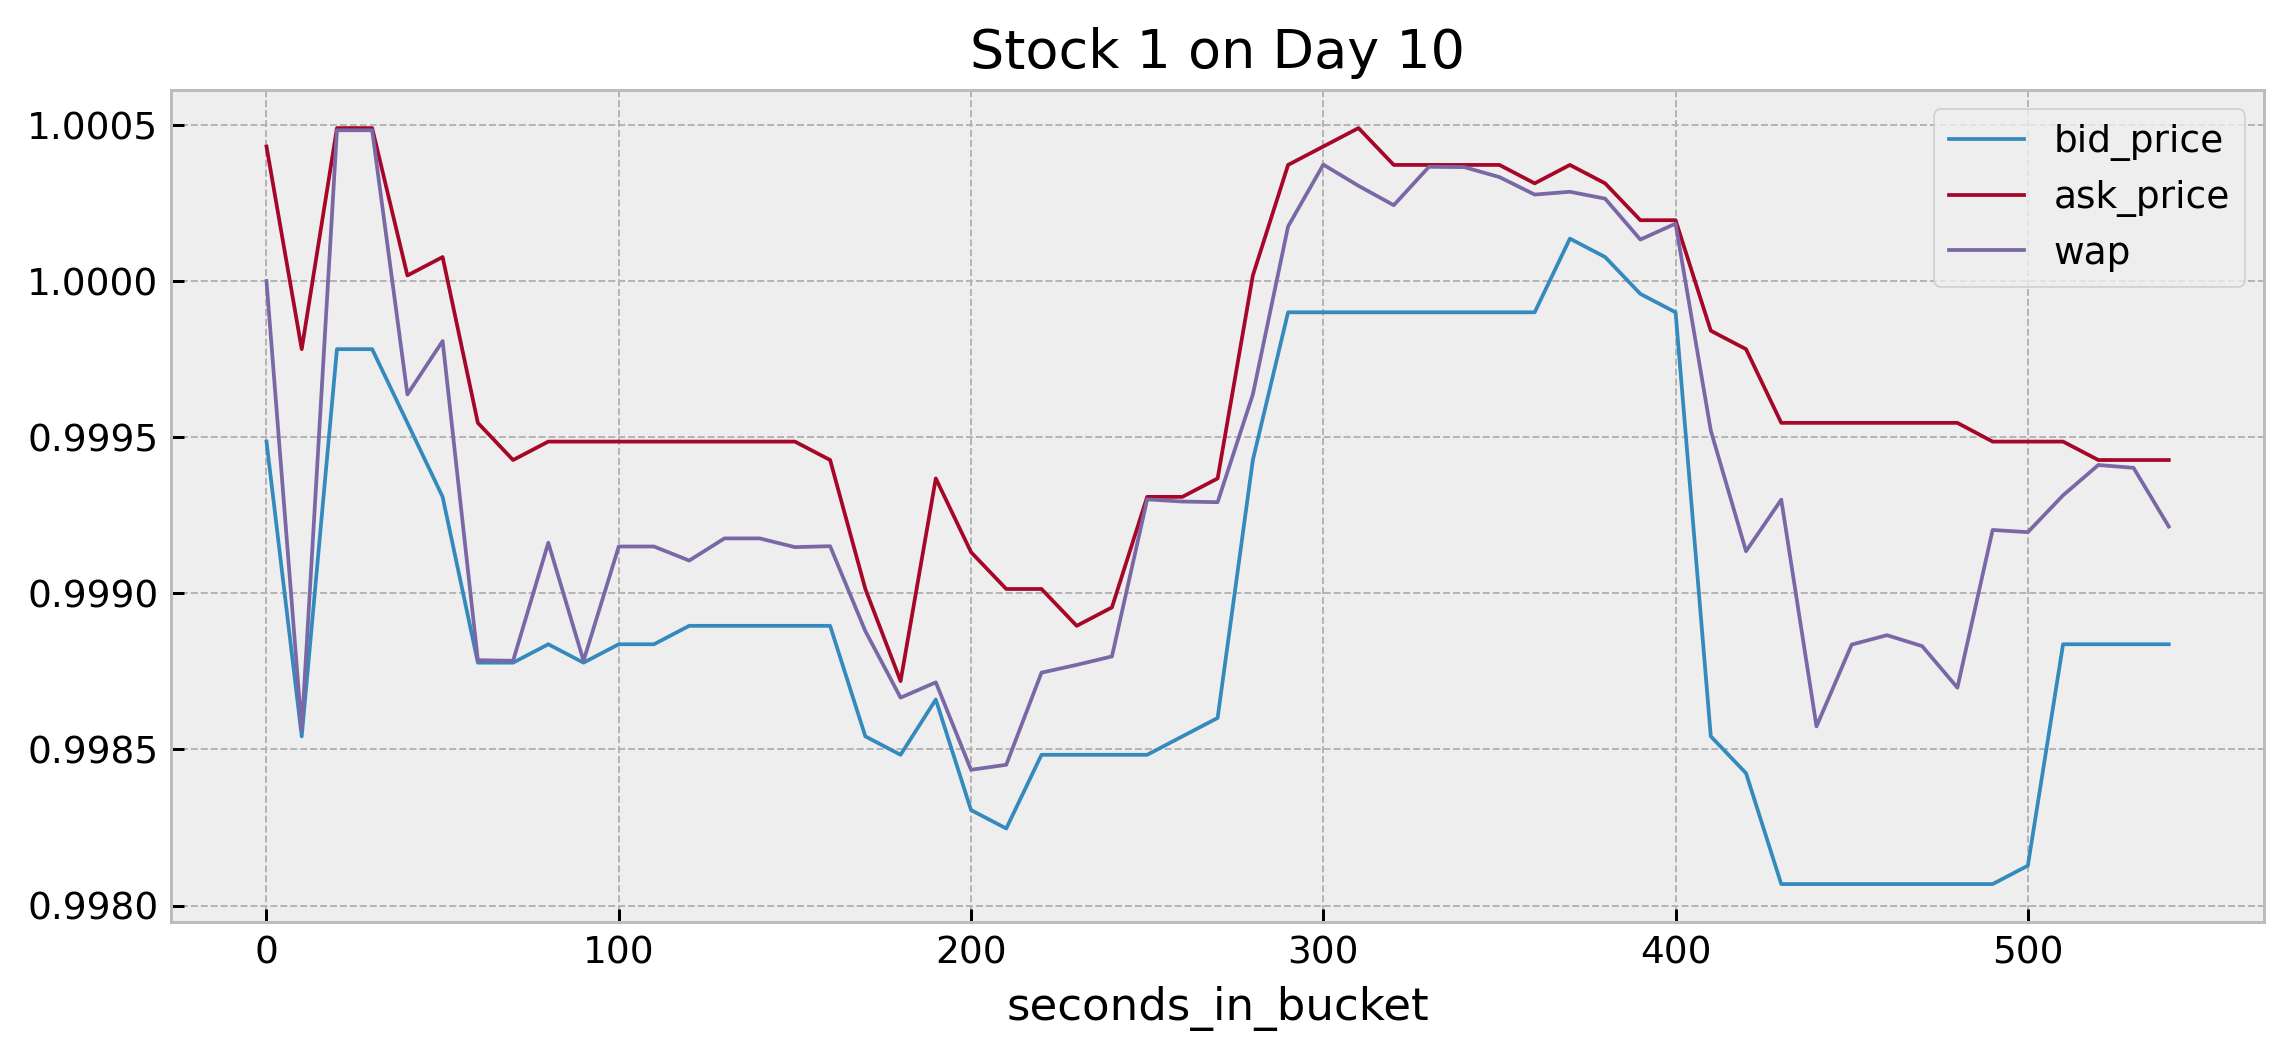

In [21]:
# We tried a few different stock_id and date_id to see the common patterns

time_series_plot(
    df=Xy_train, 
    cols=['bid_price','ask_price', 'wap'], 
    stock_id = 1,
    date_id = 10
)

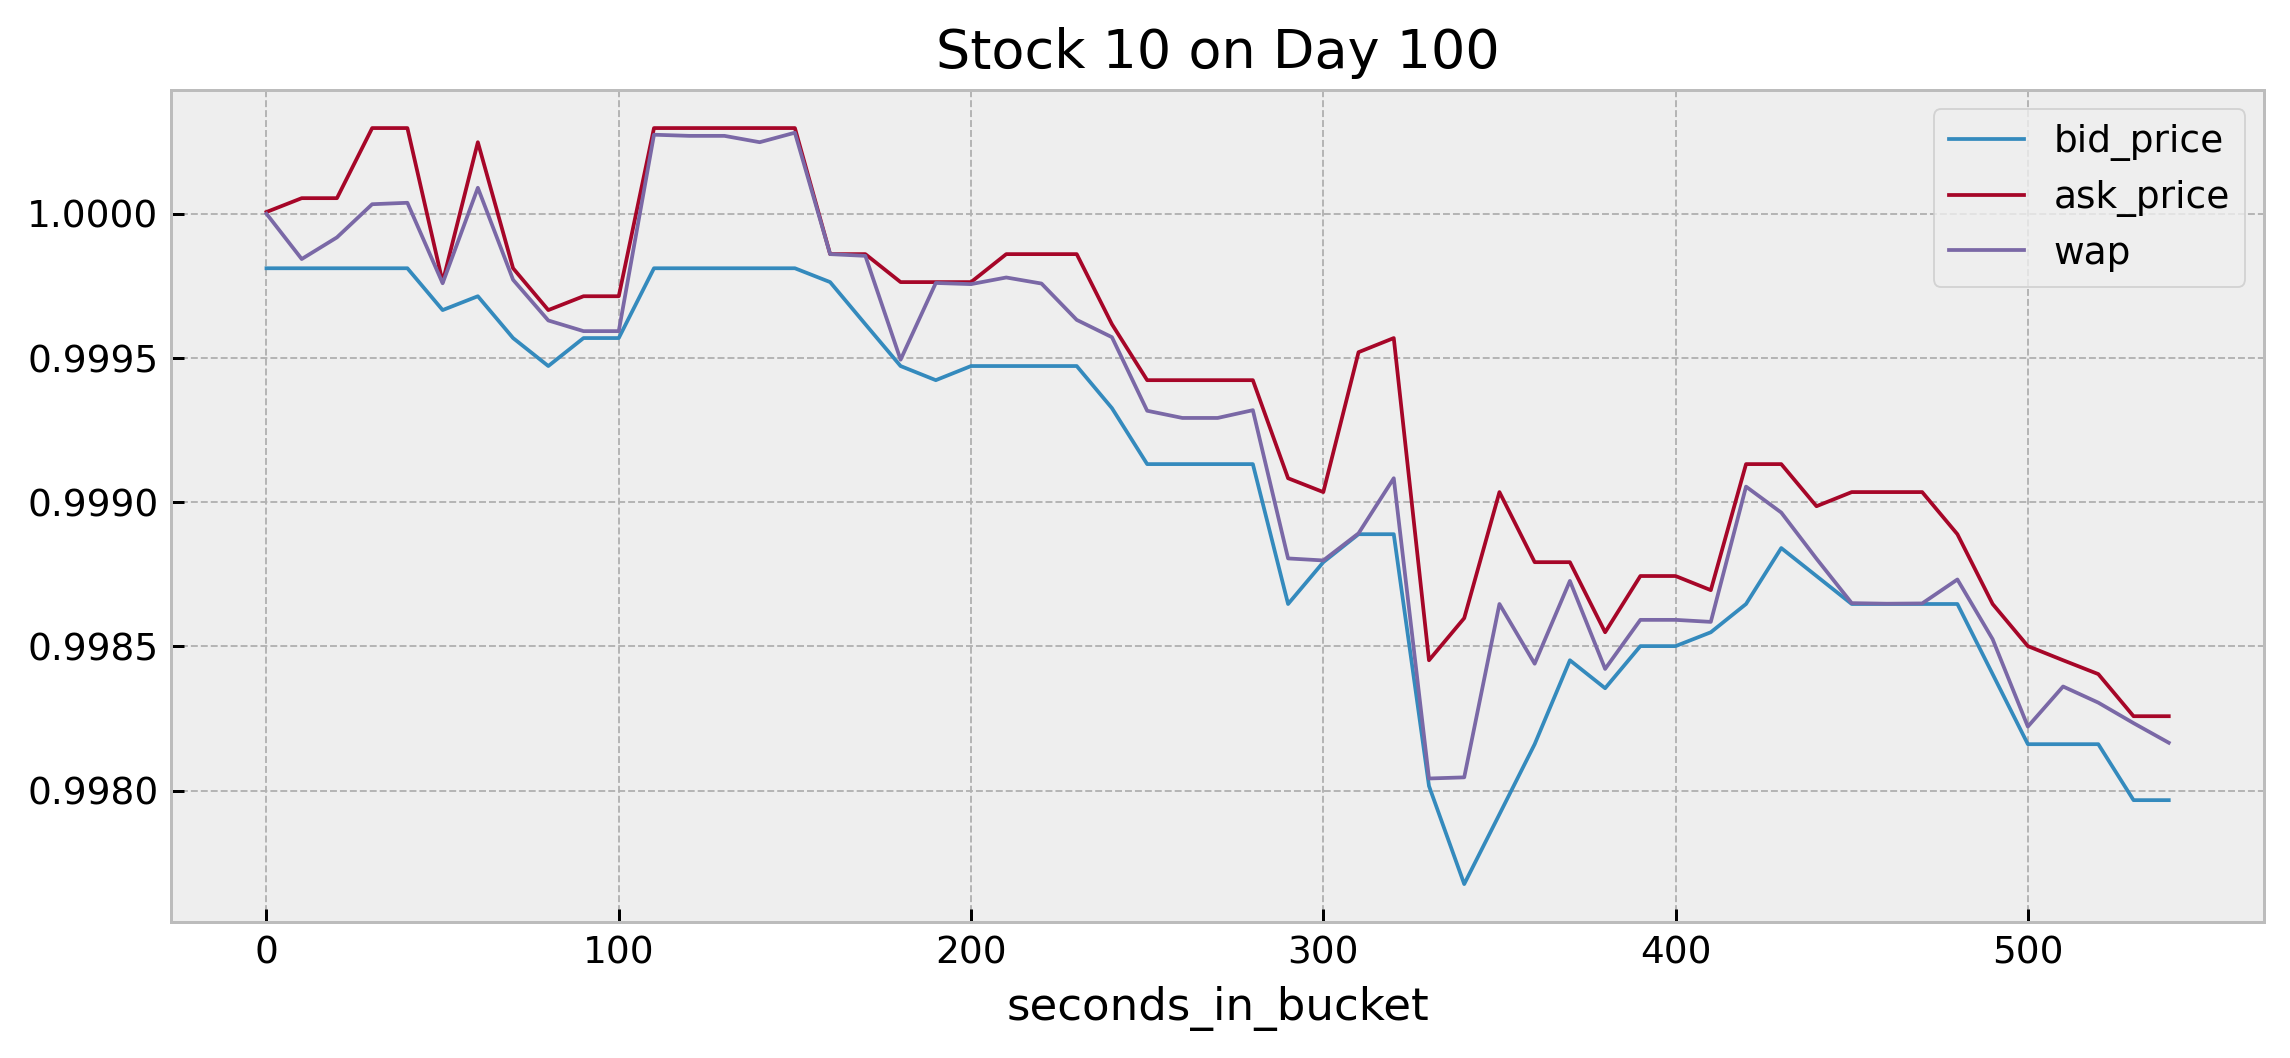

In [22]:
# Another example

time_series_plot(
    df=Xy_train, 
    cols=['bid_price','ask_price', 'wap'], 
    stock_id = 10,
    date_id = 100
)

And one more thing, all the prices shown here are converted to a price move relative to the stock `wap` (weighted average price) at the beginning of the auction period.

### 1.2.2. Auction Order Book

The concept of **Auction Order Book** is the key to understand the follwoing features:

- `imbalance_size`
- `imbalance_buy_sell_flag`
- `matched_size`
- `far_price`

So, what is an Auction Order Book? And how it differ from an (oridinary) Order Book?

**In an Auction Order Book, the orders are not immediately matched, but instead collected until the moment the auction ends.**

![](https://i.ibb.co/HFjZQV9/order-book-3.png)

In the above example, the book is referred to as **in cross**, since the best bid and ask are overlapping.

Suppose the auction ends with the book in this state, then:

- At a price of 10, 0 lots would be matched since there as no bids >= 10.

- At a price of 9, 3 lots would be matched, as there are 3 bids >=9 and 6 asks <= 9.

- At a price of 8, 4 lots would be matched, since are 7 bids>=8, and there are 4 asks<=8.

So the price which _maximizes_ the number of matched lots would be 8. In the situation like this, We would describe the Auction Order Nook in the following way:

- The **uncross price** is 8
- The **matched size** would be 4
- There are 3 Bids (7 - 4 = 3) are still unmatched, therefore, the **imbalance** would be 3 lots in the buy direction.

At any given time, the hypothetical **uncross price** (assuming the auction ends immediately) is defined as the current **far price**. 

In other words, the **far price** is the price which _maximizes_ the number of matched lots in current status of the Auction Order Book.

Nasdaq provides **far price** information 5 minutes before the closing cross (3:55 p.m.).

Describe the above situtation in terms of our "features", that would be: 

- `far_price` = 8
- `matched_size` = 4 * `reference price` (we will explain `reference price` later)
- `imbalance_size` = 3 * `reference price`
- `imbalance_buy_sell_flag` = 1 (1 for buy-side imbalance, -1 for sell-side imbalance, 0 for no imbalance)

Now let's plot some time series:

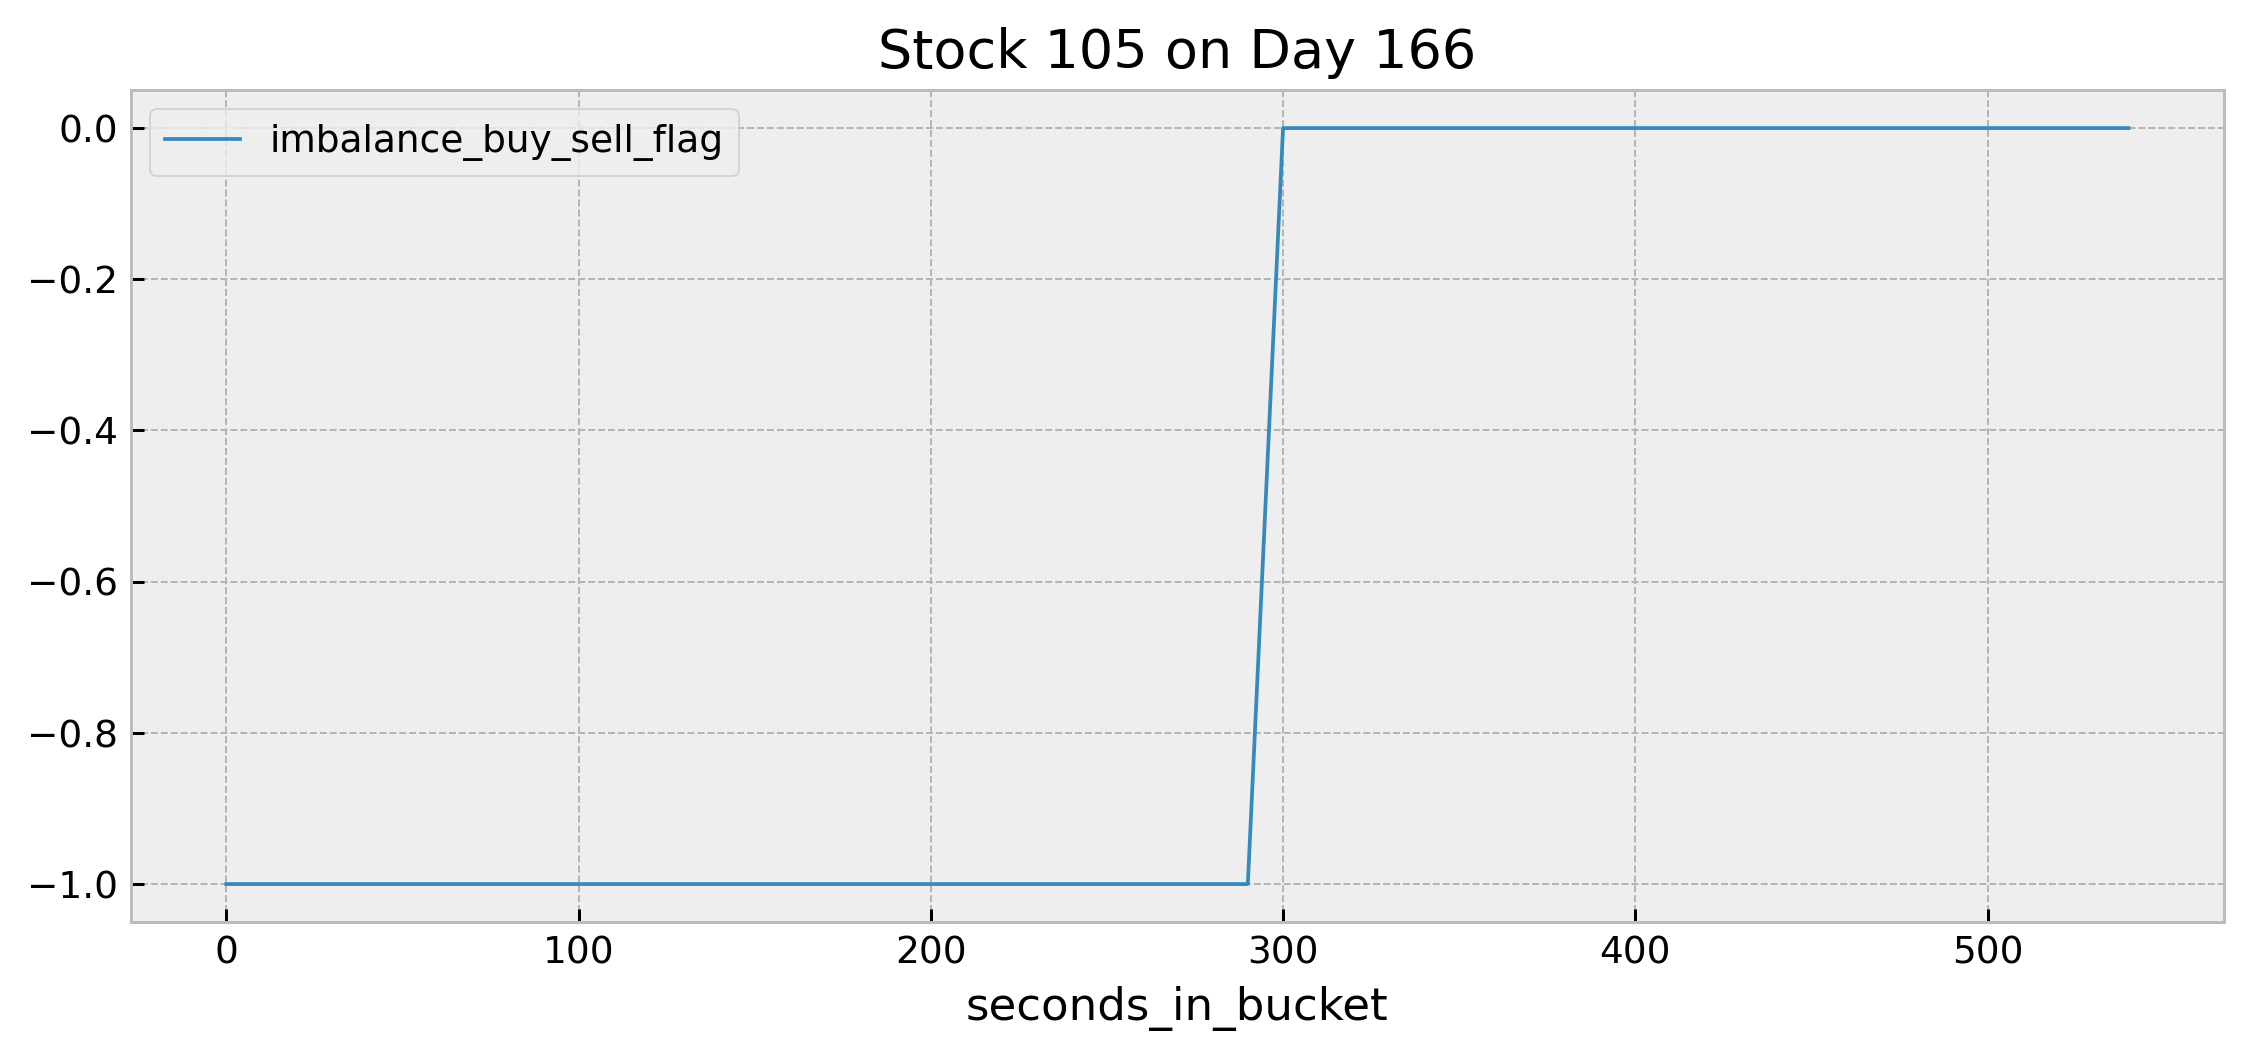

In [23]:
# To see different random stock_id and date_id, simply run the cell again
time_series_plot(
    df=Xy_train, 
    cols=['imbalance_buy_sell_flag'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

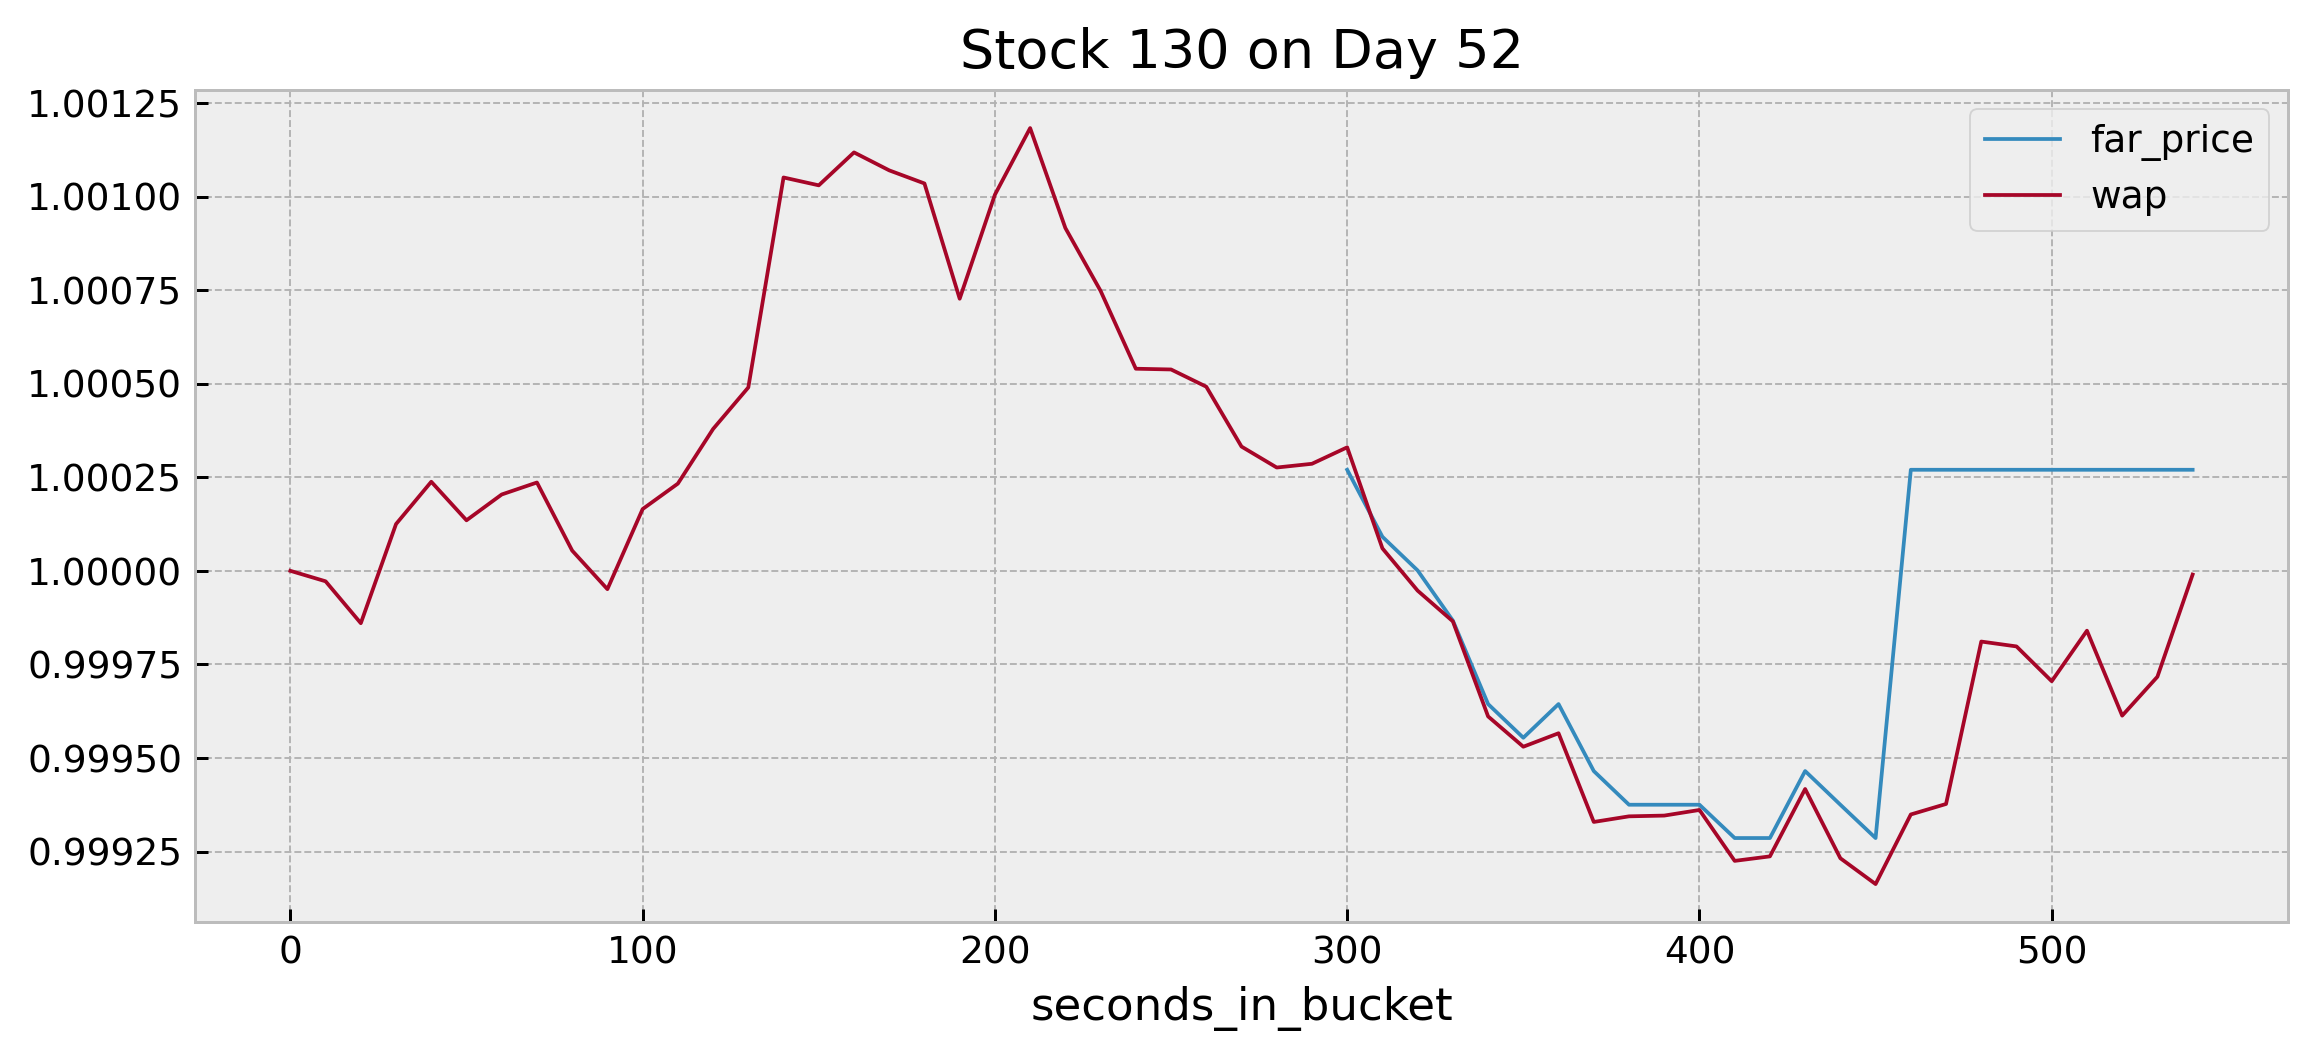

In [24]:
# Compare the far_price and wap
time_series_plot(
    df=Xy_train, 
    cols=['far_price', 'wap'],
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

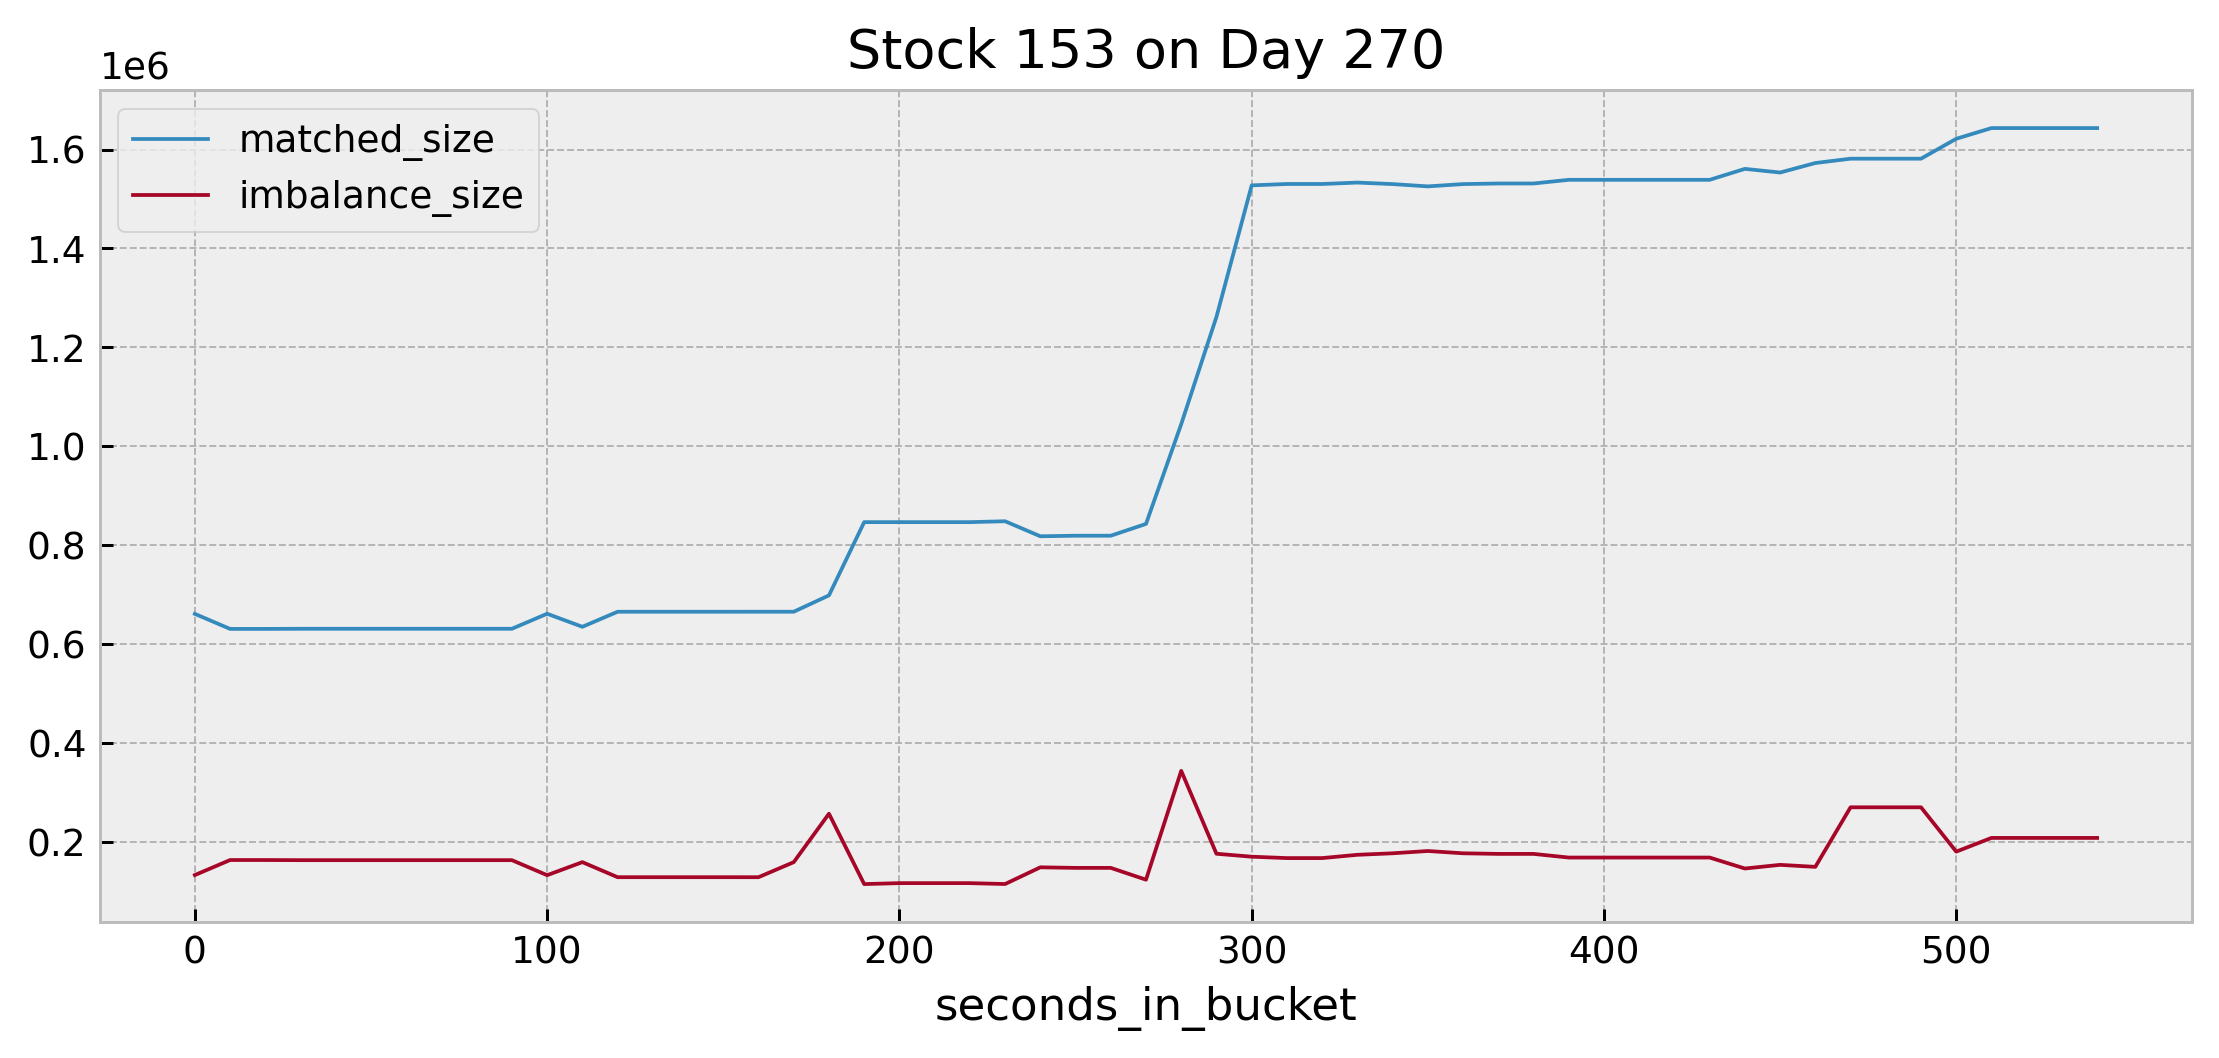

In [25]:
# Compare the matched_size and imbalance_size
time_series_plot(
    df=Xy_train, 
    cols=['matched_size', 'imbalance_size'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

After plotting the time series for different stock_id and date_id for serval times, we observe a few patterns:

- `Far Price` shows data only after `second_in_bucket`=300, which corresponds to 3:55 p.m.

- `matched_size` and `imbalance_size` significantly diverge at size, after `second_in_bucket`=240 (3:54 p.m.); `imbalance_size` tends to decrease, and `matched_size` tends to increase, after this time point.

### 1.2.3. Combined Book

Finally, the rest 2 features are related to the **Combined Book**, which is the combination of **Order Book** and **Auction Order Book**.

- `reference_price`
- `near_price`

Here we combine our previous order book example & auction book example by aggregating the buying & selling interest across all price levels.

![](https://i.ibb.co/1vPFYwz/order-book-4.png)

For this combined book:

- At a price of 10, 0 lots would be matched, as there are no bids>=10.

- At a price of 9, 5 lots would be matched, as there are 5 bids>=9 and 6 asks <=9.

- At a price of 8, 4 lots would be matched, as there are 9 bids>=8 and 4 asks <=8.

So, the price which maximizes matched lots would be the price of 9. We would therefore describe the combined order book in the following way:

- The uncross price is 9
- The matched size is 5
- The imbalance would be 1 lot, in the sell direction.

The hypothetical uncross price of combined book is called the **near price**. 

Same as the **far price**, Nasdaq provides **near price** 5 minutes before the closing cross (3:55 p.m.).

Nasdaq also provides an indication of the fair price called the **reference price**. The reference price is calculated as follows:

- If the near price is between the best bid and ask, then the reference price is equal to the near price

- If the near price > best ask, then reference price = best ask

- If the near price < best bid, then reference price = best bid So the reference price is the near price bounded between the best bid and ask.

Now let's put the `bid_price`, `ask_price`, `wap`, `far_price`, `near_price`, and `reference_price` together:

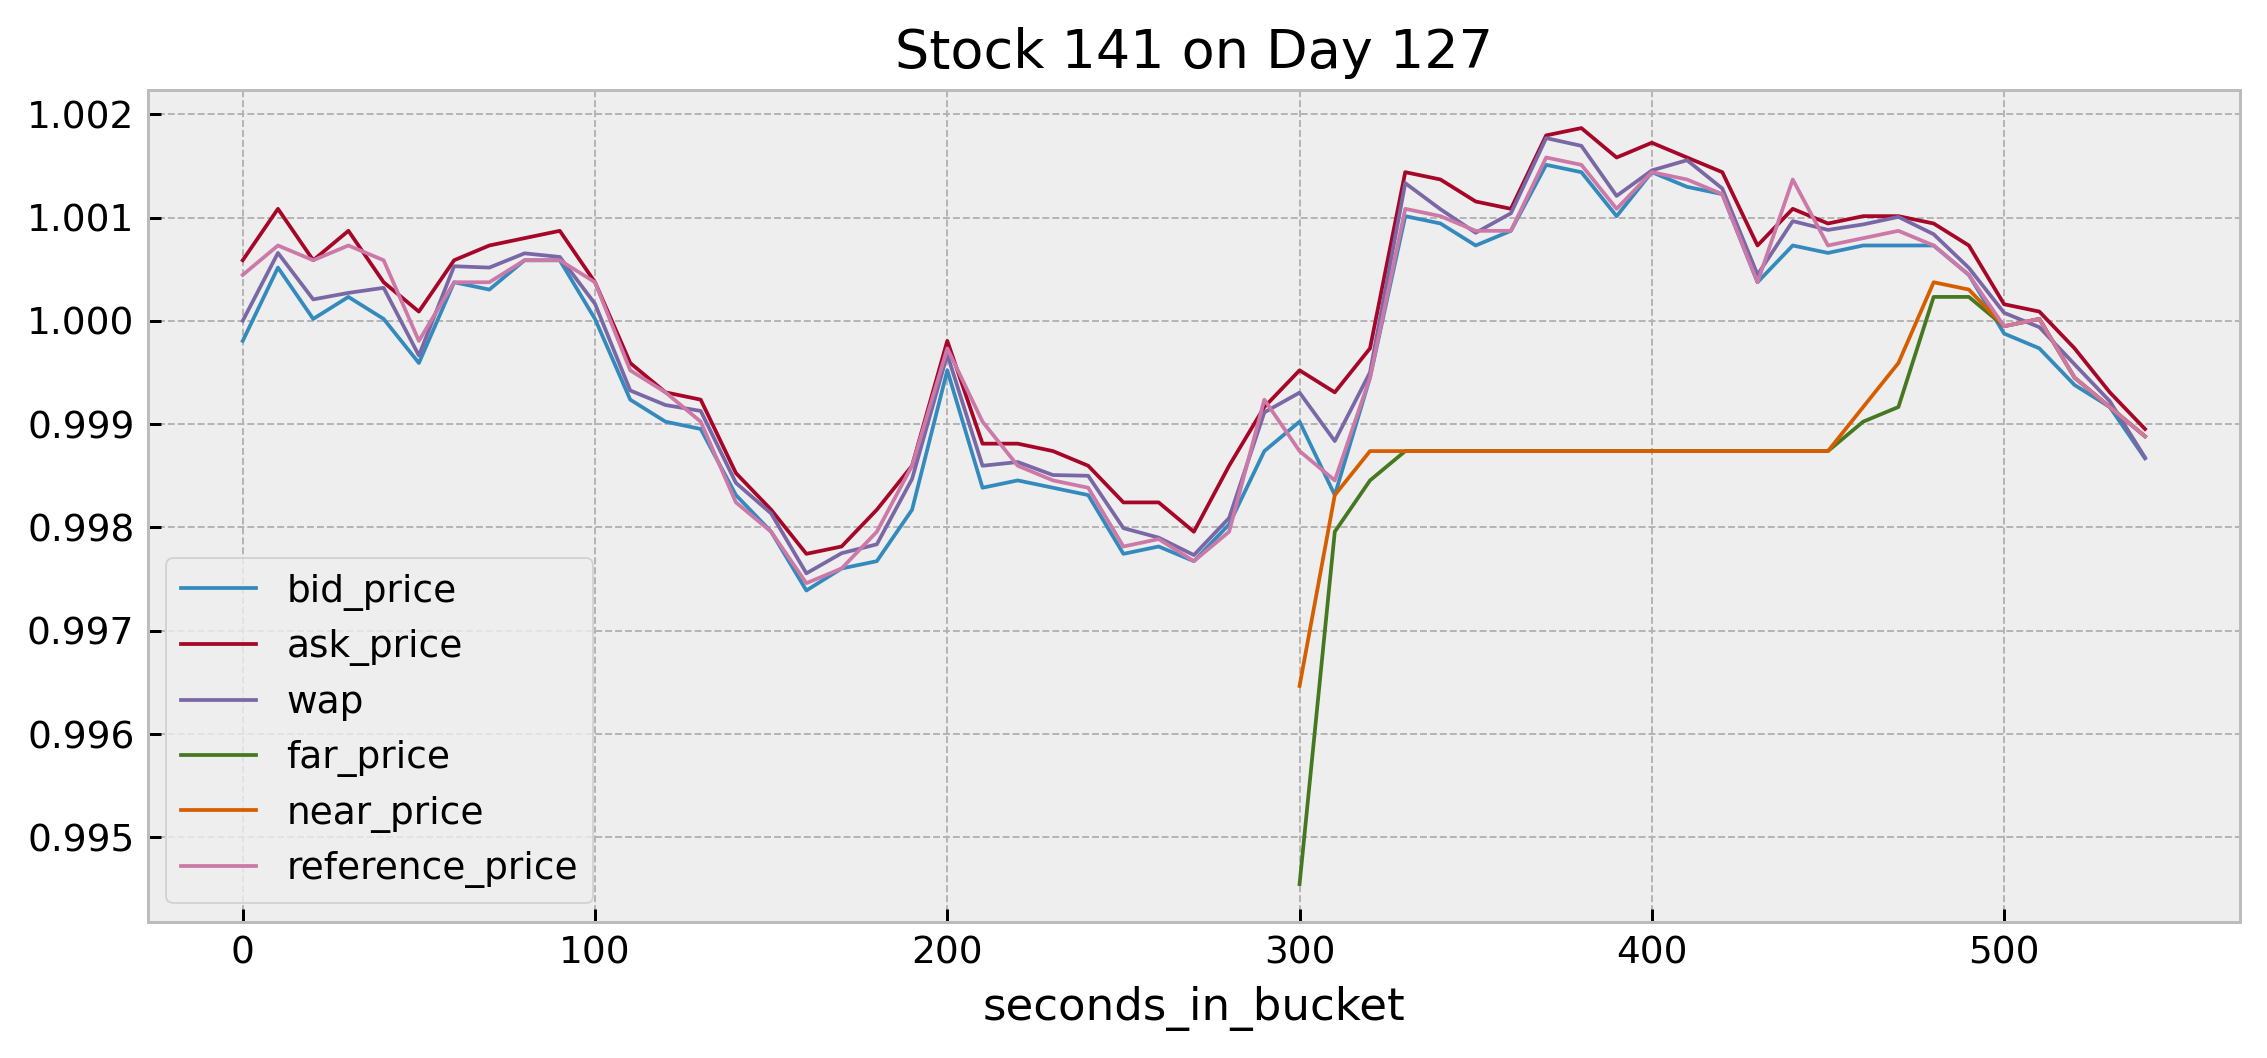

In [26]:
time_series_plot(
    df=Xy_train, 
    cols=['bid_price', 'ask_price', 'wap', 'far_price', 'near_price', 'reference_price'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

Finally, according to the [Dataset Description](https://www.kaggle.com/competitions/optiver-trading-at-the-close/data), all price related columns are converted to a price move relative to the stock `wap` at the beginning of the auction period. 

In other words, the `wap` should be 1 for all beginnings of our Time Series. Let's verify this programatically.

In [27]:
# Find all wap not equal 1 when seconds_in_bucket == 0
Xy_train.query("seconds_in_bucket == 0").query('wap != 1')

stock_id  date_id  seconds_in_bucket  imbalance_size  \
369508        131       35                  0             NaN   
3555081       101      328                  0             NaN   
4215138       158      388                  0             NaN   
4764999        19      438                  0             NaN   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
369508                     0                  NaN           NaN        NaN   
3555081                    0                  NaN           NaN        NaN   
4215138                    0                  NaN           NaN        NaN   
4764999                   -1                  NaN           NaN        NaN   

         near_price  bid_price  bid_size  ask_price  ask_size  wap  target  \
369508          NaN        NaN   0.00000        NaN   0.00000  NaN     NaN   
3555081         NaN        NaN   0.00000        NaN   0.00000  NaN     NaN   
4215138         NaN        NaN   0.00000        NaN   0.00000  NaN     NaN   
4764999         NaN        NaN   0.00000        NaN   0.00000  NaN     NaN   

         time_id     row_id  
369508      1925   35_0_131  
3555081    18040  328_0_101  
4215138    21340  388_0_158  
4764999    24090   438_0_19

Only 4 time series do not have `wap` equal to 1 at the beginning. 

And after we examine them one by one, we found that their `wap` are all NA.

In [28]:
# Let's verify the above statement programmatically

ts1 = Xy_train.query("stock_id == 131 & date_id == 35")["wap"]
ts2 = Xy_train.query("stock_id == 101 & date_id == 328")["wap"]
ts3 = Xy_train.query("stock_id == 158 & date_id == 388")["wap"]
ts4 = Xy_train.query("stock_id == 19 & date_id == 438")["wap"]

pd.concat([ts1, ts2, ts3, ts4], axis=0).isna().all()

True

## 1.3 Understand the target

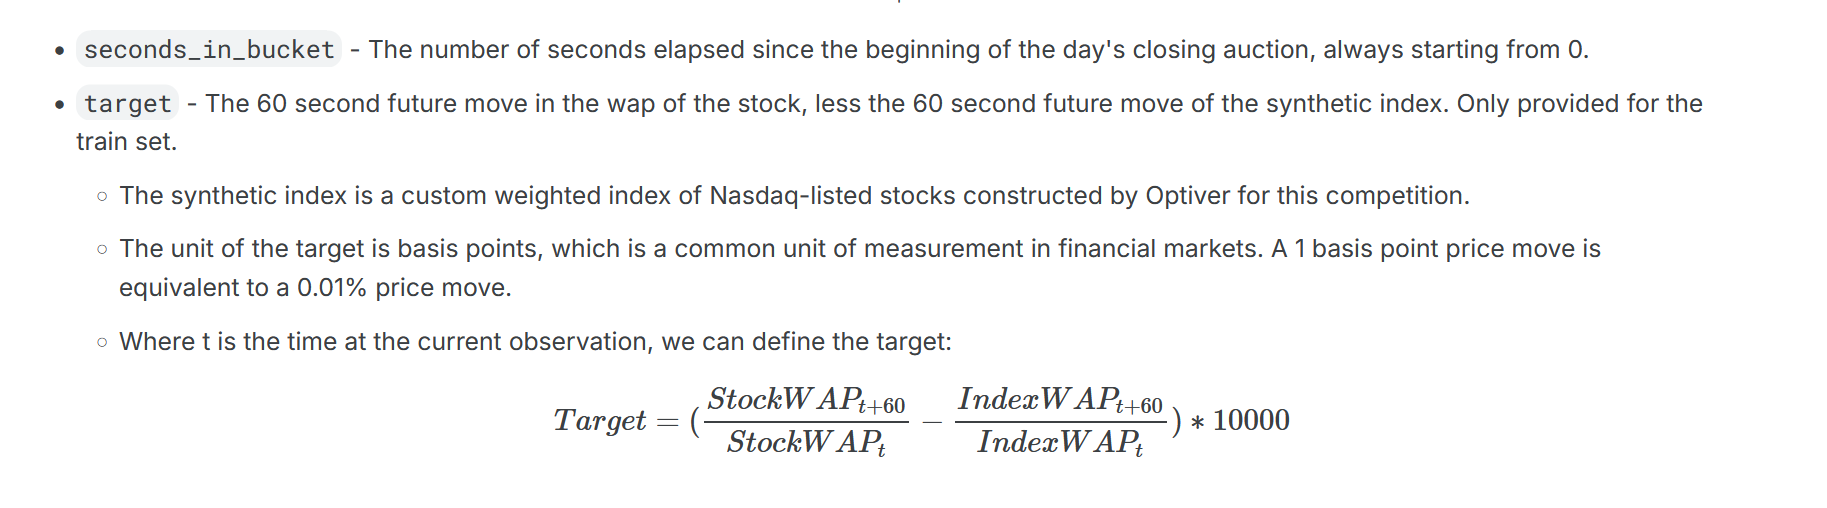

# 2. LightGBM Baseline

In [29]:
# We split the data here, and use them in the following sections

X_train = Xy_train.query("target.notna()").drop(['row_id', "time_id"], axis=1)
y_train = X_train.pop("target")

## 2.1. Naive Baseline

The following code submit a prediction that all target = 0. 

To understand how the submission API work, jump to the final section of this notebook.

In [30]:
# env = optiver2023.make_env()
# iter_test = env.iter_test()

# counter = 0
# for (test, revealed_targets, sample_prediction) in iter_test:
#     sample_prediction['target'] = 0
#     env.predict(sample_prediction)
#     counter += 1

The Naive Forecast submission yields a **score of 5.465** (2023-09-25).

As of 2023-09-25, the 1st best score on the Leaderboard is 5.3441 and the 10th best score is 5.3706.

Could the small gap between the score of our Naive Forecast and the Best score on the Leaderboard suggest that the data are of low predictability?

## 2.2. Simplest LightGBM Solution

Here, we aim to provide a valid LightGBM solution using as few lines of code as possible. To see if it beats the Naive baseline.

In [31]:
# env = optiver2023.make_env()
# iter_test = env.iter_test()

model = lightgbm.LGBMRegressor(
    random_state = SEED, 
    objective = 'mae', 
    device_type = 'gpu'
)

model.fit(X_train, y_train)

# counter = 0
# for (test, revealed_targets, sample_prediction) in iter_test:
#     sample_prediction['target'] = model.predict(test.drop('row_id', axis = 1))
#     env.predict(sample_prediction)
#     counter += 1

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3057
[LightGBM] [Info] Number of data points in the train set: 5237892, number of used features: 14
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 14 dense feature groups (79.92 MB) transferred to GPU in 0.211911 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.060201


LGBMRegressor(device_type='gpu', objective='mae', random_state=42)

In [32]:
test = pd.read_csv('./example_test_files/test.csv')
test['simple_lgb_pred'] = model.predict(test.drop('row_id', axis = 1).drop('time_id', axis = 1).drop('currently_scored', axis = 1))
test['target'] = Xy_train[Xy_train['row_id'].isin(test['row_id'])]['target']

The LightGBM Baseline submission yields a **score of 5.4209** (2023-09-25).

- 5.465 - 5.4209 = 0.0441 (Baseline LightGBM imporved the score from Naive by 0.0441)

- 5.465 - 5.3706 = 0.0944 (10th best score on the Leaderboard imporved the score by 0.0944)

- 5.465 - 5.3441 = 0.1209 (1st best score on the Leaderboard imporved the score by 0.1209)

Still a long way to go...

## 2.3. Improved LightGBM Solution

In [35]:
def calculate_imbalance_features(df):
    # Calculate and add imbalance feature 1 (imb_s1)
    df['imb_s1'] = df.eval('(bid_size - ask_size) / (bid_size + ask_size)')  

    # Calculate and add imbalance feature 2 (imb_s2)
    df['imb_s2'] = df.eval('(imbalance_size - matched_size) / (matched_size + imbalance_size)') 

    return df

In [37]:
estimator = lightgbm.LGBMRegressor(
    boosting_type='gbdt', 
    num_leaves=31, 
    max_depth=-1, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample_for_bin=200000, 
    objective='mae', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=SEED, 
    n_jobs=-1, 
    importance_type='split',
    force_row_wise=True
)

val_predictions = np.zeros(len(X_train))
val_scores = []

splitter = sk.model_selection.TimeSeriesSplit(5).split(X_train, y_train)

for fold, (train_idx, val_idx) in enumerate(splitter):
    model = sk.base.clone(estimator)

    # Define train and val set
    X_train = X_train.iloc[train_idx]
    y_train = y_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    model.fit(X_train, y_train)
    val_scores.append(sk.metrics.mean_absolute_error(model.predict(X_val), y_val))

print(f'Val Score: {np.mean(val_scores):.2f} ± {np.std(val_scores):.5f}')

1

In [30]:
# import optiver2023

# env = optiver2023.make_env()
# iter_test = env.iter_test()

# model.fit(X_train, y_train)

# counter = 0
# for (test, revealed_targets, sample_prediction) in iter_test:
#     sample_prediction['target'] = model.predict(test.drop('row_id', axis = 1))
#     env.predict(sample_prediction)
#     counter += 1

# 3. Final Thoughts

In [31]:
END = pd.Timestamp.now()
time_elapsed = (END - START).total_seconds()
print(f"Notebook Total Time: {time_elapsed:.2f}s")

Notebook Total Time: 35.09s
